# Part I - Prosper Loan Data Exploration
## by Ayame God'swill Claude

## Introduction
> This project is concerned with the exploration and visualization of the loan data from Prosper (a registered, legitimate lending company in the United States). The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income and many others. However, this project does not attempt to explore all of the variables in the dataset; we will focus our exploration on about 10-15 of them.

 



## Preliminary Wrangling


In [303]:
# To import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# and to set plots to be embedded inline
%matplotlib inline

In [304]:
# To load the dataset into a pandas dataframe

Loan_data = pd.read_csv('prosperLoanData.csv')


In [305]:
# and view the first 5 rows
Loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [306]:
# To make a copy of the original dataset before commencing some basic cleaning operation in order to retain the original
# dataset 

Loan_data_clean = Loan_data.copy()

Null values (completeness issues) in datasets are very common and could skew our analysis negatively. Thus, I decided to first check and sort out any such 

In [307]:
Loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

So, I decided to remove the following columns for either having an extremely high number of null/missing values or for being not to relevant to our analysis: CreditGrade, ClosedDate, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, GroupKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed,  ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanFirstDefaultedCycleNumber

In [308]:
Loan_data_clean.drop(['CreditGrade', 'ClosedDate', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace=True)

In [309]:
Loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   BorrowerAPR                         113912 non-null  float64
 6   BorrowerRate                        113937 non-null  float64
 7   LenderYield                         113937 non-null  float64
 8   ListingCategory (numeric)           113937 non-null  int64  
 9   BorrowerState                       108422 non-null  object 
 10  Occupation                          110349 non-null  object 
 11  EmploymentStatus          

Next, I gave attention to missing rows/records in the remaining fields/columns I decided to keep

In [310]:
# to drop all records/rows with NaN values for columns with numerical data values

Loan_data_clean.dropna(inplace=True)

In [311]:
Loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94843 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          94843 non-null  object 
 1   ListingNumber                       94843 non-null  int64  
 2   ListingCreationDate                 94843 non-null  object 
 3   Term                                94843 non-null  int64  
 4   LoanStatus                          94843 non-null  object 
 5   BorrowerAPR                         94843 non-null  float64
 6   BorrowerRate                        94843 non-null  float64
 7   LenderYield                         94843 non-null  float64
 8   ListingCategory (numeric)           94843 non-null  int64  
 9   BorrowerState                       94843 non-null  object 
 10  Occupation                          94843 non-null  object 
 11  EmploymentStatus                    9484

In [312]:
Loan_data_clean.shape

(94843, 63)

In [313]:
Loan_data_clean.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
Term                             int64
LoanStatus                      object
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 63, dtype: object

Now, since reading a dataset into a pandas dataframe could result in inadvertent misrepresentation of datatypes, the following columns were reconverted to the appropriate data types using the codes in the code cells below: 

1. ListingCreationDate, FirstRecordedCreditLine, LoanOriginationDate and DateCreditPulled [all to datetime]

2. LoanStatus, ListingCategory and EmploymentStatus [all to categorical]

3. EmploymentStatusDuration [to integer 64]. 

In [314]:
# To change the data types of ListingCreationDate, FirstRecordedCreditLine, LoanOriginationDate and DateCreditPulled to the datetime data type

Loan_data_clean['ListingCreationDate'] = pd.to_datetime(Loan_data['ListingCreationDate'])

Loan_data_clean['FirstRecordedCreditLine'] = pd.to_datetime(Loan_data['FirstRecordedCreditLine'])

Loan_data_clean['LoanOriginationDate'] = pd.to_datetime(Loan_data['LoanOriginationDate'])

Loan_data_clean['DateCreditPulled'] = pd.to_datetime(Loan_data['DateCreditPulled'])

In [315]:
# Checking to be sure it worked
Loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94843 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ListingKey                          94843 non-null  object        
 1   ListingNumber                       94843 non-null  int64         
 2   ListingCreationDate                 94843 non-null  datetime64[ns]
 3   Term                                94843 non-null  int64         
 4   LoanStatus                          94843 non-null  object        
 5   BorrowerAPR                         94843 non-null  float64       
 6   BorrowerRate                        94843 non-null  float64       
 7   LenderYield                         94843 non-null  float64       
 8   ListingCategory (numeric)           94843 non-null  int64         
 9   BorrowerState                       94843 non-null  object        
 10  Occupation           

Now, I also noticed that the spacing in the variable name ListingCategory (numeric) could pose a problem later in my analysis. So I replaced with ListingCategory_numeric

In [316]:
Loan_data_clean.rename(columns = {'ListingCategory (numeric)':'ListingCategory_numeric'}, inplace = True)
Loan_data_clean.head(2)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory_numeric,BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.158,0.138,0,CO,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.092,0.082,2,CO,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [317]:
# To convert LoanStatus, ListingCategory_numeric and EmploymentStatus to categorical data type

Loan_data_clean.LoanStatus = Loan_data_clean.LoanStatus.astype('category')
Loan_data_clean.EmploymentStatus = Loan_data_clean.EmploymentStatus.astype('category')

In [318]:
# To list out the actual categories/levels/unique values that exist for the categorical variable 
# LoanStatus

Loan_data_clean.LoanStatus.unique()

['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff', ..., 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'FinalPaymentInProgress', 'Past Due (>120 days)', 'Cancelled']
Length: 12
Categories (12, object): ['Cancelled', 'Chargedoff', 'Completed', 'Current', ..., 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']

In [319]:
# To list out the actual categories/levels/unique values that exist for the categorical variable 
# EmploymentStatus

Loan_data_clean.EmploymentStatus.unique()

['Self-employed', 'Employed', 'Other', 'Full-time', 'Not employed', 'Part-time', 'Retired']
Categories (7, object): ['Employed', 'Full-time', 'Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed']

In [320]:
# To create a dictionary to convert the categorical variables LoanStatus and EmploymentStatus 
# into ordered categorical data types (which would be useful later for my analysis)

ordinal_var_dict = {'LoanStatus': ['Completed', 'FinalPaymentInProgress', 'Current', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff', 'Cancelled'],
                    'EmploymentStatus': ['Self-employed', 'Full-time', 'Part-time', 'Employed', 'Other', 'Retired', 'Not employed', 'Not available']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    Loan_data_clean[var] = Loan_data_clean[var].astype(ordered_var)

The cell above completed the little necessary wrangling steps to clean my dataset.

Now, to catch a glimpse of the structure of my cleaned dataset, I used the following codes below

In [321]:
# To observe the 1st 5 records of the cleaned dataset

Loan_data_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory_numeric,BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,0,CO,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,2,CO,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,16,GA,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,2,MN,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,0.1214,1,NM,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [322]:
# To obseve a random sample of the cleaned dataset
Loan_data_clean.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory_numeric,BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
44154,C57935949083911265EA649,1059345,2013-11-27 10:57:40.030,36,Current,0.27776,0.2394,0.2294,1,VA,...,-25.24,0.0,0.00,0.00,0.0,1.0,0,0,0.0,15
36857,B7F5359747434154021A546,1042714,2013-12-09 18:50:55.170,36,Current,0.17611,0.1400,0.1300,1,PA,...,-28.56,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
70225,3C023595854031246DA4CE3,1048061,2013-12-03 14:44:54.643,60,Current,0.18555,0.1620,0.1520,1,UT,...,-12.67,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
39199,F15535958171203702E24B3,1057715,2013-12-06 11:08:28.707,36,Current,0.16732,0.1314,0.1214,1,PA,...,-5.88,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
67355,70CE35909003633946E11B5,932245,2013-10-01 09:53:55.713,36,Current,0.14816,0.1199,0.1099,1,VA,...,-59.21,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
55292,B7D13400888824334622BFB,206889,2007-09-25 19:20:06.120,36,Completed,0.18722,0.1795,0.1695,0,MO,...,-39.44,0.0,0.00,0.00,0.0,1.0,1,0,0.0,81
64437,446534180340096089C1D44,312658,2008-04-17 09:18:56.043,36,Chargedoff,0.28320,0.2600,0.2500,4,VA,...,-29.83,0.0,856.64,856.64,0.0,1.0,0,0,0.0,55
71858,FC743581370707303CE987B,807664,2013-06-13 08:29:37.087,36,Current,0.25371,0.2159,0.2059,1,MA,...,-93.40,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
84374,A9BB3592511508965D1DE8E,975021,2013-10-13 11:13:55.297,60,Current,0.22549,0.2010,0.1910,1,FL,...,-15.21,0.0,0.00,0.00,0.0,1.0,0,0,0.0,90
27750,CFBA3579633243507796EDC,799383,2013-06-06 05:40:26.647,36,Current,0.33286,0.2932,0.2832,1,VA,...,-25.19,0.0,0.00,0.00,0.0,1.0,0,0,0.0,73


In [323]:
# To observe the last 5 records of the cleaned dataset

Loan_data_clean.tail()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory_numeric,BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663,36,Current,0.22354,0.1864,0.1764,1,IL,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,7,PA,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703,60,Current,0.23984,0.2150,0.2050,1,TX,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597,60,Completed,0.28408,0.2605,0.2505,2,GA,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657,36,Current,0.13189,0.1039,0.0939,1,NY,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [324]:
# To look at the data types of the cleaned dataset 
Loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94843 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ListingKey                          94843 non-null  object        
 1   ListingNumber                       94843 non-null  int64         
 2   ListingCreationDate                 94843 non-null  datetime64[ns]
 3   Term                                94843 non-null  int64         
 4   LoanStatus                          94843 non-null  category      
 5   BorrowerAPR                         94843 non-null  float64       
 6   BorrowerRate                        94843 non-null  float64       
 7   LenderYield                         94843 non-null  float64       
 8   ListingCategory_numeric             94843 non-null  int64         
 9   BorrowerState                       94843 non-null  object        
 10  Occupation           

### What is the structure of your dataset?

> Making use of the Prosper Loan Data Variables documentation, I identified the following

> My current edited dataset contains 94,843 loans/records with 63 variables/columns on each loan, including columns like loan amount, borrower rate (or interest rate), current loan status, borrower income and many others. Most variables are numeric in nature with a few being of the string/object data types (namely  ListingKey,  ListingCategory_numeric, ListingCreationDate, LoanStatus, BorrowerState, Occupation, EmploymentStatus, DateCreditPulled,  FirstRecordedCreditLine, IncomeRange, LoanKey, LoanOriginationDate, LoanOriginationQuarter and MemberKey. While IsBorrowerHomeowner, IncomeVerifiable and CurrentlyInGroup are of the Boolean data type 

> LoanStatus is actually categorical, containing the following levels (from best to worst, judging from the perspective of the Prosper firm): 'Completed', 'FinalPaymentInProgress', 'Current', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff' and 'Cancelled'

> ListingCategory_numeric is actually a numeric-categorical variable with 21 levels represented by figures. The numeric levels and their meanings are as follows:  0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

> EmploymentStatus is categorical, with values like 'Self-employed', 'Full-time', 'Part-time', 'Employed', 'Other', 'Retired', 'Not employed', 'Not available'



### What is/are the main feature(s) of interest in your dataset?

> My main features of interest in the above dataset are captured via the following questions:

1. What affects the borrower’s APR or interest rate (target/dependent variables of interest = BorrowerAPR and BorrowerRate)? 
2. What factors affect a loan’s outcome status (target/dependent variable of interest = LoanStatus)?
3. Are there differences between loans depending on how large the original loan amount was (predictor/independent variable of interest = LoanOriginalAmount)?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> As for the first question above, factors (variables) that affect the borrower's APR or loan interest rate should include:  Term, LenderYield, ListingCategory, Occupation, EmploymentStatusDuration, StatedMonthlyIncome, MonthlyLoanPayment and LoanOriginalAmount

> For the second question above, I imagine the following features/variables would play a role: Term, BorrowerAPR, BorrowerRate, ListingCategory, Occupation,  EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, DebtToIncomeRatio, CurrentCreditLines, OpenRevolvingAccounts,   OpenRevolvingMonthlyPayment, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, IncomeRange, StatedMonthlyIncome, MonthlyLoanPayment and Investors. 
Whilst not necessarily trying out all the listed variables, I intend to find out which of these would have the greatest effect on the LoanStatus target variable.

> And as regards the third question above, I suspect that the following variables can be interacted with LoanOriginalAmount to ascertain if there exists differences in the way loans are rated/created/generated/awarded based on the original amount of the loan:   Term, BorrowerAPR/ BorrowerRate, ListingCategory_numeric and Investors

## Univariate Exploration

### Question

What is the distribution like for the LoanStatus variable?

### Visualization

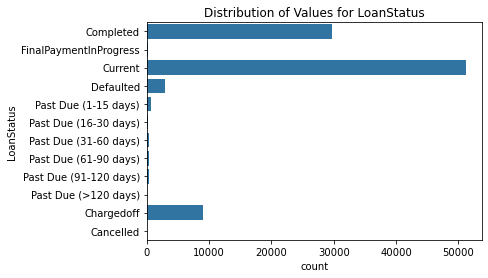

In [325]:
# Plotting the LoanStatus on a horizontal bar chart (since it's a categorical variable) using Seaborn's count plot function

base_color = sb.color_palette()[0]
sb.countplot(data=Loan_data_clean, y='LoanStatus', color=base_color);
plt.title('Distribution of Values for LoanStatus');   # Semi-colon added to remove the text above the visualization

### Observations

The bar chart above reveals that most of the values occur between the Completed and Current status. And this is expected since no loan-giving company would remain in business for long if most of their loans were Defaulted, ChargedOff or Cancelled. So it would appear that there are no outliers of concern in this column

To get a deeper understanding of the distribution of data, I decided to use relative frequency (comparing levels in terms of the proportions of the whole, where the heights of the bars indicate the proportion of data taking each level rather than the absolute frequency count.)

In [326]:
# Count the frequency of unique values in the LoanStatus column. 
# The code below returns the decreasing order of the frequency by default.

type_counts = Loan_data_clean['LoanStatus'].value_counts()
type_counts

Current                   51170
Completed                 29732
Chargedoff                 9021
Defaulted                  2889
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Cancelled                     1
Name: LoanStatus, dtype: int64

In [327]:
# To return the sum of all non-null values in the LoanStatus column
n_LoanStatus = Loan_data_clean['LoanStatus'].value_counts().sum()

# To return the highest frequency in the LoanStatus column
max_type_count = type_counts[0]

# To return the maximum proportion (in other words, compute the length of the longest bar in terms of the proportion)
max_prop = max_type_count / n_LoanStatus
print(max_prop)

0.5395232120451694


In [328]:
# To use numpy.arange() function to produce a set of evenly spaced proportioned values between 0 and max_prop, with a step size of 2% or 0.02

tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52])

In [329]:
# To use a list comprehension to create tick_names that we will apply to the tick labels. 
# And pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.02f}` denotes that before formatting, we use 2 digits of precision, while `f` is used to represent floating point number.

tick_names = ['{:0.02f}'.format(v) for v in tick_props]
tick_names

['0.00',
 '0.02',
 '0.04',
 '0.06',
 '0.08',
 '0.10',
 '0.12',
 '0.14',
 '0.16',
 '0.18',
 '0.20',
 '0.22',
 '0.24',
 '0.26',
 '0.28',
 '0.30',
 '0.32',
 '0.34',
 '0.36',
 '0.38',
 '0.40',
 '0.42',
 '0.44',
 '0.46',
 '0.48',
 '0.50',
 '0.52']

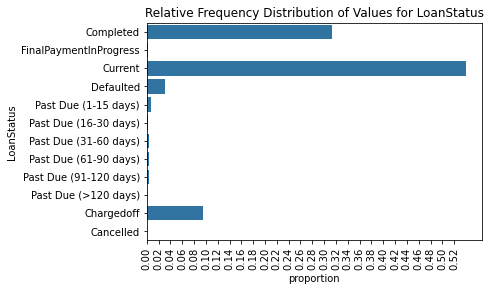

In [330]:
# To plot the bar chart with new x-tick labels

sb.countplot(data=Loan_data_clean, y='LoanStatus', color=base_color);

# To change the tick locations and labels
plt.xticks(tick_props * n_LoanStatus, tick_names)
plt.xlabel('proportion');
plt.title('Relative Frequency Distribution of Values for LoanStatus')

# To use xticks to rotate the 'proportion' axis values (not the axes themselves) counter-clockwise to avoid overlapping of values
plt.xticks(rotation=90);    

So it would seem that the results above agree with this one

### Question

What is the distribution like for the BorrowerAPR and BorrowerRate variables?

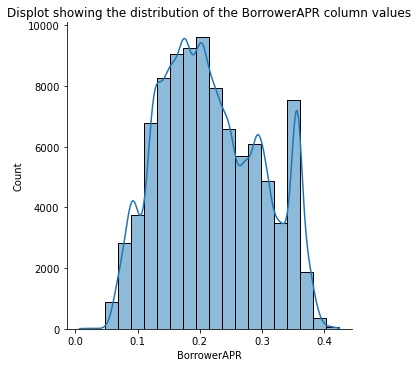

In [331]:
# Plotting the BorrowerAPR on a histogram (since it's a numerical/quantitative variable)

# Using Seaborn's displot() function to make a displot (histogram alongside with the KDE plot) to see what we’re dealing with

sb.displot(data=Loan_data_clean, x='BorrowerAPR', kind='hist', height=5, aspect=1, kde=True, bins=20)
plt.title('Displot showing the distribution of the BorrowerAPR column values');

In [332]:
# Checking for the skew value of the BorrowerAPR column

Loan_data_clean['BorrowerAPR'].skew()

0.24171908935209915

As seen from the kde (Kernel Density Estimate) curve above, BorrowerAPR has a reasonably fairly normal distribution (plotting in original units/values) with a positive skew value of 0.24, which is reasonably okay.

But I tried to investigate further by invoking the log function to transform the x-scale values to log values with the aim of simplifying the description of the distribution of the BorrowerAPR variable. This also helps if we were to build a model

In [333]:
# Applying log function to the column values and checking for the skew value of the column once again
BorrowerAPR_log = np.log(Loan_data_clean['BorrowerAPR'])
BorrowerAPR_log.skew()

-0.5217101133725434

In [334]:
# To obtain the required log10 minimun bin value of the BorrowerAPR column

print(np.log10(Loan_data_clean.BorrowerAPR.min()))

# To obtain the required log10 maximum bin value of the BorrowerAPR column
print(np.log10(Loan_data_clean.BorrowerAPR.max()))

# Print satements used to ensure all codes are executed and outputed at once

-2.185086818724926
-0.3726853603991191


In [335]:
# And to see the minimum and maximum of the original values of the BorrowerAPR variable

Loan_data_clean.BorrowerAPR.describe()

count    94843.000000
mean         0.218183
std          0.080425
min          0.006530
25%          0.155380
50%          0.208080
75%          0.283200
max          0.423950
Name: BorrowerAPR, dtype: float64

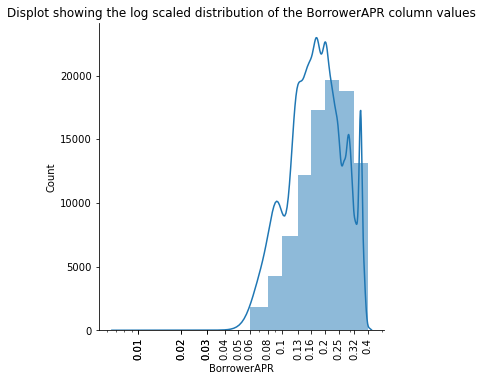

In [336]:
# To plot the log-scaled displot of the BorrowerAPR variable using the x-scale technique 
# (that is, setting the log bins)

# Setting the bins based on the log10 distribution, but changing them back to original units (using 10** )
log_binsize = 0.1
bins = 10** (np.arange(-2.00, -0.40+log_binsize, log_binsize))

# Rounding the values (to make the plot easier to interpret)
bins = [round(x,2) for x in bins]

sb.displot(data = Loan_data_clean, x = 'BorrowerAPR', kde=True, bins = bins)
plt.xscale('log')

#  Using the percentiles values (min, 25%, 50%, 75% and max) from the .describe() output above to set the xtick labels
ticks = [0.01,0.16,0.21,0.28,0.42]

# Rounding the values (to make the plot easier to interpret)

plt.xticks(bins,bins, rotation = 90);

plt.title('Displot showing the log scaled distribution of the BorrowerAPR column values');

This shoots out a negative/left skew, which is even higher than the original plot skew. So, using log transformation does not help this column, and the data is not log-normally distributed.

Thus, there seem to be records (outliers) in this variable requiring some attention since most of the data is set to the far right of their axes, suggesting some strong outliers on the left. The left limits of all three plots also suggest that there are some points that take unusually small values.

So, I decided to take a bit of time to identify these outliers and see if they need to be filtered out of the data before going on with my visualization

In [337]:
# To select low outliers using criteria visually observed from the ordinary-scale plot above 
# (minimum value of the bins on the x-axis)

low_outliers = (Loan_data_clean['BorrowerAPR'] < 0.05)

print(low_outliers.sum())
print(Loan_data_clean.loc[low_outliers,:])

22
                     ListingKey  ListingNumber     ListingCreationDate  Term  \
1839    367234574528085749991E3         416970 2009-07-17 09:21:37.610    36   
5823    2E07339232691202922692B         156918 2007-06-23 10:32:34.540    36   
9517    0C0B3499722393755B476D1         482802 2010-11-04 12:56:29.977    12   
15993   C25A3406939968877C77DD2         246366 2007-12-07 08:09:25.833    36   
20993   043D3389270464618FF9BA8         133611 2007-05-06 20:47:08.770    36   
33287   6F723403076471690BBA7CE         223827 2007-10-31 10:31:36.283    36   
45878   36D23386050248407008F40         122293 2007-04-11 16:36:57.897    36   
46874   3F5C3389508503122919326         143562 2007-05-28 06:40:54.803    36   
50251   F3D634235667827325CACD4         357197 2008-06-25 17:43:40.637    36   
53423   437334016695421433C8823         216769 2007-10-16 12:22:08.443    36   
65259   BB4E34191946516388AD563         310792 2008-04-15 05:35:10.670    36   
76035   18003392717086064DCD291      

So, there are 22 outliers with unusually low values. Most of them have a 0 value for LP_CollectionFees,  LP_GrossPrincipalLoss,  LP_NetPrincipalLoss,  LP_NonPrincipalRecoverypayments, Recommendations, InvestmentFromFriendsCount and InvestmentFromFriendsAmount. The high number of zeros in these columns suggest there might have been an error in data input.

In [338]:
# To select high outliers using criteria visually observed from the ordinary-scale plot above 
# (maximum value of the bins on the x-axis)

high_outliers = (Loan_data_clean['BorrowerAPR'] > 0.43)

print(high_outliers.sum())
print(Loan_data_clean.loc[high_outliers,:])

0
Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, Term, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, ListingCategory_numeric, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, LoanCurrentDaysDelinquent, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, Mo

So, there is no outlier with unusually high values. 

As a precautionary measure, I decided to remove all of these inconsistent points from the data. aAnd then I recreated the plot below

In [339]:
# To remove points with inconsistent values.

Loan_data_clean = Loan_data_clean.loc[-low_outliers,:]

In [340]:
# Checking to be sure code was executed
Loan_data_clean.shape

(94821, 63)

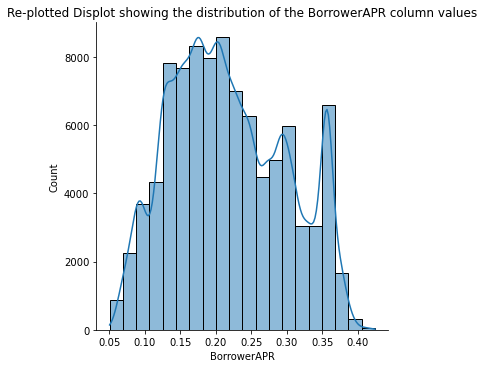

In [341]:
# And now re-plotting the BorrowerAPR column using ordinary scale

sb.displot(data=Loan_data_clean, x='BorrowerAPR', kind='hist', height=5, aspect=1, kde=True, bins=20)
plt.title('Re-plotted Displot showing the distribution of the BorrowerAPR column values');

In [342]:
# Re-checking for the skew value of the BorrowerAPR column

Loan_data_clean['BorrowerAPR'].skew()

0.24367822841108824

As seen from the kde (Kernel Density Estimate) curve above, BorrowerAPR now has a slightly better normal distribution (plotting in original units/values) than before and is a bit less skewed. Thus, we should feel comfortable with any analytical results obtained with this variable

Now, considering the BorrowerRate variable

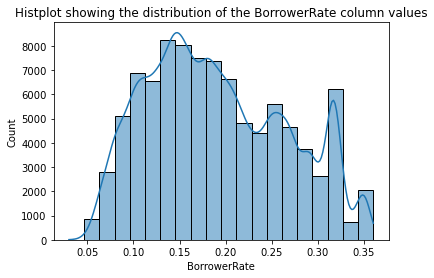

In [343]:
# Plotting the BorrowerRate on a histogram (since it's a numerical/quantitative variable)

# Using Seaborn's histplot() function to make a histplot (alongside with the KDE plot) to see what we’re dealing with

sb.histplot(data=Loan_data_clean, x='BorrowerRate', kde=True, bins=20)
plt.title('Histplot showing the distribution of the BorrowerRate column values');

In [344]:
# And checking for the skew value of the column
Loan_data_clean['BorrowerRate'].skew()

0.3157659716440533

As seen from the kde (Kernel Density Estimate) curve above, BorrowerRate has a reasonably fairly normal distribution with a positive skew value of 0.32, which is reasonably okay.

But I tried to investigate further by invoking the log function with the aim of simplifying the description of the distribution of the BorrowerAPR variable. This also helps if we were to build a model

In [345]:
# To get the log-scaled skew value

BorrowerRate_log = np.log(Loan_data_clean['BorrowerRate'])
BorrowerRate_log.skew()

-0.387532827131045

Looking at the visualization of the log transformation...

In [346]:
np.log10(Loan_data_clean.BorrowerRate.max())

-0.44369749923271273

In [347]:
np.log10(Loan_data_clean.BorrowerRate.min())

-1.5228787452803376

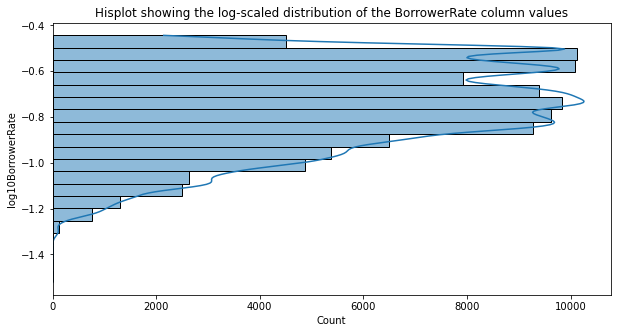

In [348]:
# Using the technique of log10 values directly and the number of bins (as an alternative approach to the xscale method, and then using sb.histplot() function to show the bins that this creates
Loan_data_clean['log10BorrowerRate'] = np.log10(Loan_data_clean.BorrowerRate)

# Setting the number of bins to be 20 (could be from 20 to 30, or even up to 50 if skewed)
# And adding edgecolor and borders to the bars (again, for ease of interpretation)
plt.figure(figsize=[10, 5])
sb.histplot(data = Loan_data_clean, y  = 'log10BorrowerRate', bins = 20, kde=True)

# Since the bins are in log10, we get the original units as the inverse, and use these as labels
new_labels = [10**(x) for x in bins]

# To round the labels (for ease of interpretation)
new_labels = [round(x,2) for x in new_labels]
plt.title('Hisplot showing the log-scaled distribution of the BorrowerRate column values');

It's obvious there's still some skew to the right. So, the log transformation of the values of the BorrowerRate column does not necessarily improve the column which tells us that we may need to look deeper because there may be records (outliers) in this variable requiring some immediate attention since some of the data is set to the far left of their axis, suggesting some outliers on the right. 

So, I decided to take a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [349]:
# To select low outliers using criteria visually observed from the ordinary-scale plot above 
# (minimum value of the bins on the x-axis)

low_outliers_2 = (Loan_data_clean['BorrowerRate'] < 0.05)

print(low_outliers_2.sum())
print(Loan_data_clean.loc[low_outliers_2,:])

61
                     ListingKey  ListingNumber     ListingCreationDate  Term  \
913     7A43350749111898469912E         494277 2011-02-17 08:42:37.697    12   
935     3E6334163897800675BCE34         295758 2008-03-19 15:48:23.440    36   
1749    0B72350801536743063B573         494648 2011-02-17 20:24:48.380    12   
3400    558535099599991680CB549         496244 2011-03-01 10:02:07.643    12   
5384    2D633507237976648A5629C         494603 2011-02-17 18:41:56.420    12   
...                         ...            ...                     ...   ...   
102642  8DE935077432044900A203D         494484 2011-02-17 14:46:23.300    12   
105206  CACD3506893430120E817A8         493166 2011-02-07 13:30:42.007    12   
105769  6C1534234458345939C2483         355339 2008-06-22 18:29:48.150    36   
107197  DAD13508769639244B3F758         494126 2011-02-17 00:20:32.860    12   
111994  D52535073218170743684E4         494338 2011-02-17 12:15:32.357    12   

       LoanStatus  BorrowerAPR  Borr

So, there are 61 outliers with unusually low values. Most of them have a 0 value for LP_CollectionFees,  LP_GrossPrincipalLoss,  LP_NetPrincipalLoss,  LP_NonPrincipalRecoverypayments, Recommendations, InvestmentFromFriendsCount and InvestmentFromFriendsAmount. The high number of zeros in these columns suggest there might have been an error in data input.

In [350]:
# To select high outliers using criteria visually observed from the ordinary-scale plot above 
# (maximum value of the bins on the x-axis)

high_outliers_2 = (Loan_data_clean['BorrowerRate'] > 0.35)

print(high_outliers_2.sum())
print(Loan_data_clean.loc[high_outliers_2,:])

16
                     ListingKey  ListingNumber     ListingCreationDate  Term  \
3404    2A8A35008564862370A423B         485306 2010-11-22 09:47:17.770    36   
7568    2D9034190574220588B3F32         318807 2008-04-26 14:30:40.850    36   
14151   067A34321033182291DFF2C         401059 2008-09-19 13:23:21.427    36   
26338   9EB0342790578527020386C         380791 2008-08-11 03:42:38.173    36   
39271   BAF0342981992538706FBA1         386711 2008-08-22 10:33:02.123    36   
39525   795F3421261638296916704         332364 2008-05-14 06:36:59.067    36   
43886   E0F23428121860859AE38E4         378535 2008-08-05 20:59:41.750    36   
68456   D84D34114582035634E7971         276261 2008-02-05 15:27:56.297    36   
71936   7B61341722701986062BB5C         308073 2008-04-11 20:31:10.307    36   
79033   D94434997509198939B0F33         485600 2010-11-24 09:11:09.863    36   
81295   8EDC3424026586901B41D87         360252 2008-07-01 00:31:38.723    36   
87514   5DBA3483981621529717F1E      

So, there are 16 outliers with unusually high values. Most of them, just like the low outliers, have a 0 value for LP_CollectionFees,  LP_GrossPrincipalLoss,  LP_NetPrincipalLoss,  LP_NonPrincipalRecoverypayments, Recommendations, InvestmentFromFriendsCount and InvestmentFromFriendsAmount. The high number of zeros in these columns suggest there might have been an error in data input.

As a precautionary measure, I decided to remove all of these inconsistent points from the data. And then I recreated the plot below

In [351]:
# To remove points with inconsistent values.

Loan_data_clean = Loan_data_clean.loc[-low_outliers_2 & -high_outliers_2,:]

In [352]:
# Checking to be sure code was executed
Loan_data_clean.shape

(94744, 64)

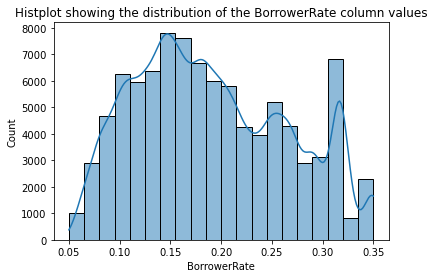

In [353]:
# Re-plotting the BorrowerRate column using ordinary scale

sb.histplot(data=Loan_data_clean, x='BorrowerRate', kde=True, bins=20)
plt.title('Histplot showing the distribution of the BorrowerRate column values');

In [354]:
# Re-checking for the skew value of the BorrowerAPR column

Loan_data_clean['BorrowerRate'].skew()

0.3171885166869756

We can at this point conclude that BorrowerRate has a fairly normal distribution (plotting in original units/values) and is not badly skewed. Thus, we should feel comfortable with any analytical results obtained with this variable

### Question

What is the distribution like for the LoanOriginalAmount variable?

### Visualization

I chose to use a histogram here. To plot the histogram, I used descriptive statistics to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges will then be set using numpy's arange function:

In [355]:
Loan_data_clean.LoanOriginalAmount.describe()

count    94744.000000
mean      8752.372752
std       6380.918304
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [356]:
# To create a standard scaled plot histogram, I used the codes below to obtain the maximum and minimum
# values in the range of values for the column
# Print satements used to ensure all codes are executed and outputed at once
    
print(Loan_data_clean['LoanOriginalAmount'].max())   
print(Loan_data_clean['LoanOriginalAmount'].min())

35000
1000


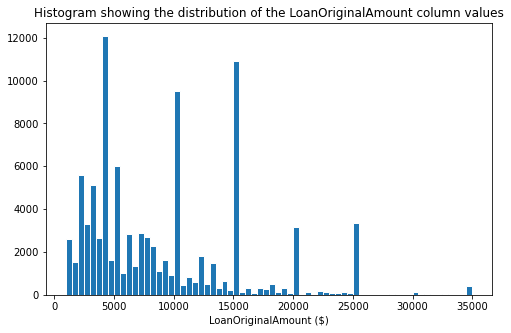

In [357]:
# To create the standard scaled plot histogram of the LoanOriginalAmount variable with bins of step-size 5
binsize = 500
bins = np.arange(1000, 35000+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = Loan_data_clean, x = 'LoanOriginalAmount', bins = bins, edgecolor = "white")
plt.xlabel('LoanOriginalAmount ($)')
plt.title('Histogram showing the distribution of the LoanOriginalAmount column values');

In [358]:
Loan_data_clean['LoanOriginalAmount'].skew()

1.160670884237835

As seen, the histogram does not appear really normally distributed (most loans are of the range approx. 4800, or 10,000 or 15,000), and with a skew value of 1.16 we may need to do further investigations

Investigating further to see if the skew can be further reduced

In [359]:
LoanOriginalAmount_log = np.log(Loan_data_clean['LoanOriginalAmount'])
LoanOriginalAmount_log.skew()

-0.2482170357327815

So we now have a rather lower skew in the negative/left sense.

Now, looking at the log-scaled plot

In [360]:
# To obtain the required log10 minimun and maximum bin values respectively of the
# LoanOriginalAmount column

print(np.log10(Loan_data_clean.LoanOriginalAmount.min()))
print(np.log10(Loan_data_clean.LoanOriginalAmount.max()))

3.0
4.544068044350276


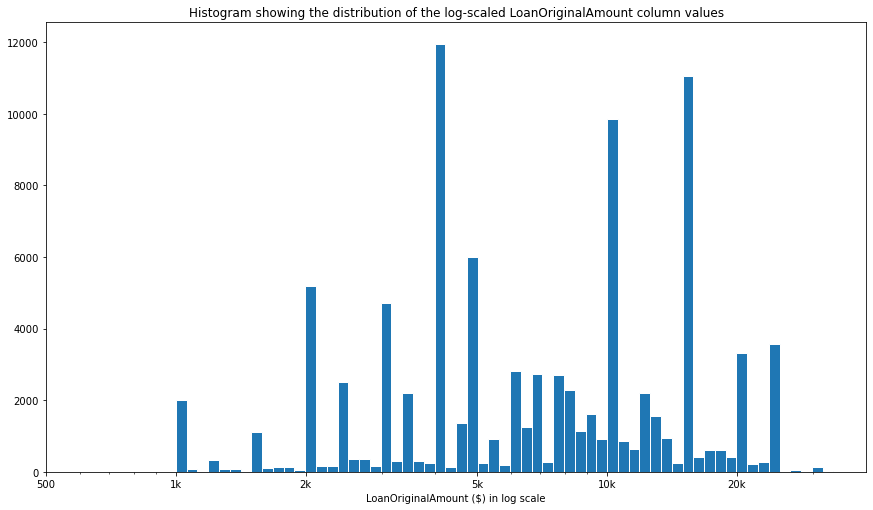

In [361]:
# To plot the log-scaled histogram of the LoanOriginalAmount variable using the x-scale technique
# (that is, setting the log bins)

# Setting the bins based on the log10 distribution, but changing them back to original units (using 10** )
log_binsize = 0.025
bins = 10** (np.arange(3.0, 4.5+log_binsize, log_binsize))

# Rounding the values (to make the plot easier to interpret)
bins = [round(x,1) for x in bins]

# To add figure size, edgecolor and borders to the bars (again, for ease of interpretation)
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data = Loan_data_clean, x  = 'LoanOriginalAmount', bins = bins, edgecolor = "white")
plt.xscale('log')

# Setting the tick labels of the x-axis to a certain set range of values for neater presentation
# since the number of tick labels generated by default is too much and tend to overlap
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('LoanOriginalAmount ($) in log scale')
plt.title('Histogram showing the distribution of the log-scaled LoanOriginalAmount column values');

As can be seen, the LoanOriginalAmount variable when plotted on a log scale looks quite log-normally distributed and it also agrees with the previous result without log scaling in terms of the areas with high peaks. The distribution of the values is not badly skewed to the right or left. Thus, we may conclude there is insignificant outlier issue with this variable

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The LoanStatus variable appeared skewed to the right, with most of the values occurring between the Completed and Current status. To get a deeper understanding of the distribution of data, I decided to use relative frequency (comparing levels in terms of the proportions of the whole, where the heights of the bars indicate the proportion of data taking each level rather than the absolute frequency count). But at the end, I determined that the variable values are useable the way they are.

> The BorrowerAPR and BorrowerRate variables have a reasonably fairly normal distribution (plotting in original units/values) but with some skew. But I tried to investigate further by using the log function transformation with the aim of simplifying the description of the distribution of these variables, and the results again gave some skew.  So, I took some time to identify these outliers, filtered them out of the dataset and then went on to reproduce the visualization.

> The LoanOriginalAmount produced a visualization which did not appear really normally distributed (most values were shifted to the left with a skew to the right, suggesting possible outliers. So I did a log transformation which produced a visualization that was log-normally distributed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The BorrowerAPR and BorrowerRate variables when investigated further using the log function transformation with the aim of simplifying the description of the distribution of these variables, the results again gave some skew, suggesting the presence of some strong outliers.  So, I took some time to identify these outliers, and I noticed that most of them have a zero (0) value for a number of columns in the dataset. The high number of zeros in these columns suggest there might have been an error in data input. So, for safety purposes, I decided to filter them out of the dataset and then went on to reproduce the visualizations. This way, I was able to obtain a normally distributed visualization for these variables

## Bivariate Exploration

> In this section, I tried investigating the relationships between pairs of variables in my
dataset.

### Question

What pairwise correlations exist between the features/variables in the dataset?

### Visualization

I decided to investigate the above question following the format:

> Observe the relationship between the numeric variables using correlation plot and plot matrix

> Examine the relationship between the categorical vs numeric variables using plot matrix

> Check the relationship between the categorical variables using a clustered bar chart

In [362]:
# Taking a quick glance at the correlation between all the numeric variables in the dataset
Loan_data_clean.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory_numeric,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,log10BorrowerRate
ListingNumber,1.000000,0.305601,-0.074088,-0.138880,-0.136999,0.037701,0.145681,0.030691,-0.351283,0.152778,...,0.114780,-0.257823,-0.252863,-0.105869,0.029359,-0.171469,-0.124939,-0.067300,-0.345362,-0.105651
Term,0.305601,1.000000,-0.016858,0.022320,0.022917,-0.023481,0.085215,0.077125,-0.117086,0.111888,...,0.036195,-0.032615,-0.029993,-0.035367,-0.025089,-0.066335,-0.049691,-0.026225,-0.056329,0.076252
BorrowerAPR,-0.074088,-0.016858,1.000000,0.991292,0.991219,0.118566,0.000235,-0.128975,-0.035897,-0.512670,...,-0.041465,0.061885,0.062058,0.027288,-0.021822,-0.046297,-0.047815,-0.028659,-0.316665,0.972569
BorrowerRate,-0.138880,0.022320,0.991292,1.000000,0.999605,0.099261,-0.010343,-0.124911,0.000968,-0.525057,...,-0.052603,0.090907,0.090632,0.040049,-0.024064,-0.029702,-0.036540,-0.022659,-0.280817,0.976036
LenderYield,-0.136999,0.022917,0.991219,0.999605,1.000000,0.100886,-0.009654,-0.123705,-0.008362,-0.519055,...,-0.052248,0.089449,0.089172,0.039044,-0.024223,-0.030145,-0.036537,-0.022911,-0.280439,0.974892
ListingCategory_numeric,0.037701,-0.023481,0.118566,0.099261,0.100886,1.000000,-0.007140,-0.059504,-0.100385,0.041913,...,0.017842,-0.043914,-0.042940,-0.025274,-0.006134,-0.036239,-0.025824,-0.017355,-0.081478,0.084659
EmploymentStatusDuration,0.145681,0.085215,0.000235,-0.010343,-0.009654,-0.007140,1.000000,0.170387,-0.073313,0.075926,...,0.009775,-0.034252,-0.033655,-0.004177,-0.001980,-0.041203,-0.033006,-0.020038,-0.043501,-0.003377
IsBorrowerHomeowner,0.030691,0.077125,-0.128975,-0.124911,-0.123705,-0.059504,0.170387,1.000000,-0.034970,0.295609,...,-0.002263,0.027721,0.028214,0.003823,-0.008767,-0.014400,-0.011176,-0.005134,0.119608,-0.132031
CurrentlyInGroup,-0.351283,-0.117086,-0.035897,0.000968,-0.008362,-0.100385,-0.073313,-0.034970,1.000000,-0.198473,...,-0.046811,0.125387,0.123270,0.065479,0.016927,0.176901,0.132472,0.056547,0.109949,-0.000330
CreditScoreRangeLower,0.152778,0.111888,-0.512670,-0.525057,-0.519055,0.041913,0.075926,0.295609,-0.198473,1.000000,...,0.039618,-0.047781,-0.047008,-0.045892,-0.030476,-0.066359,-0.031680,-0.033389,0.301407,-0.554540


In [363]:
# Listing all the variable types I am choosing to explore
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'BorrowerRate', 'Term', 'LenderYield', 'StatedMonthlyIncome', 'EmploymentStatusDuration', 'MonthlyLoanPayment', 'DebtToIncomeRatio', 'CurrentCreditLines', 'TotalTrades', 'Investors']
categoric_vars = ['Occupation', 'LoanStatus', 'EmploymentStatus', 'ListingCategory_numeric', 'IsBorrowerHomeowner']

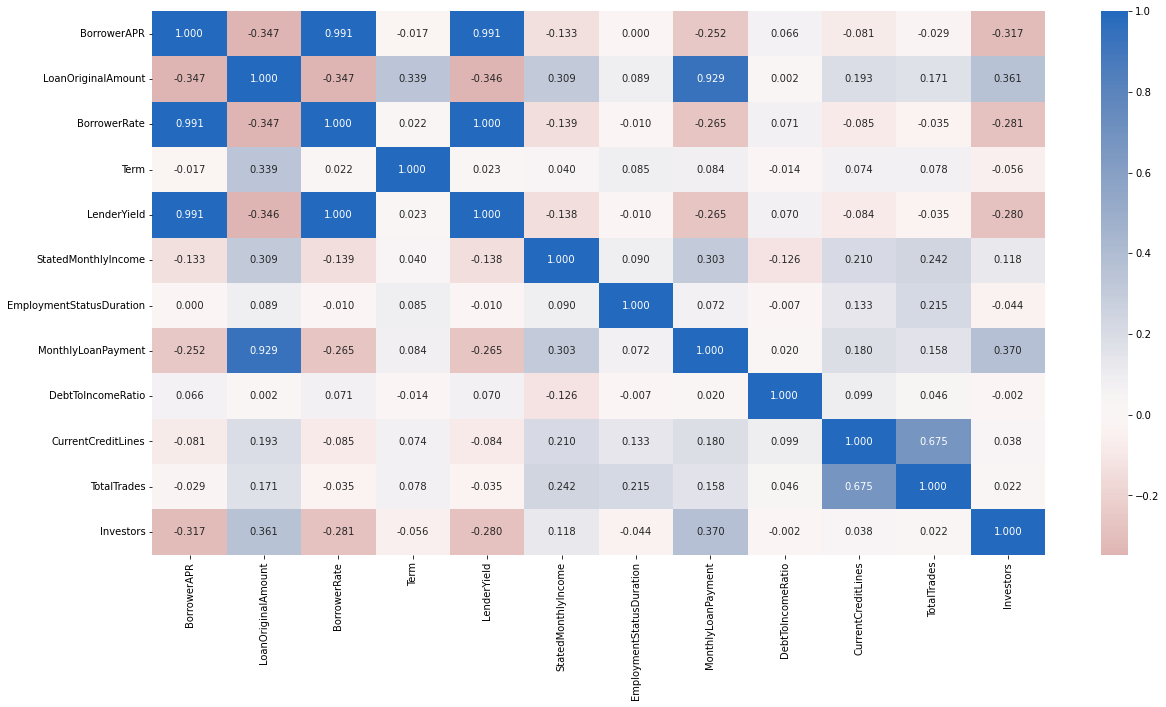

In [364]:
# Using Seaborn's heatmap function for the correlation plot of the numeric variables

plt.figure(figsize = [20, 10])
sb.heatmap(Loan_data_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

Loan_data_clean.shape= (94744, 64)
Loan_data_clean_samp.shape= (500, 64)


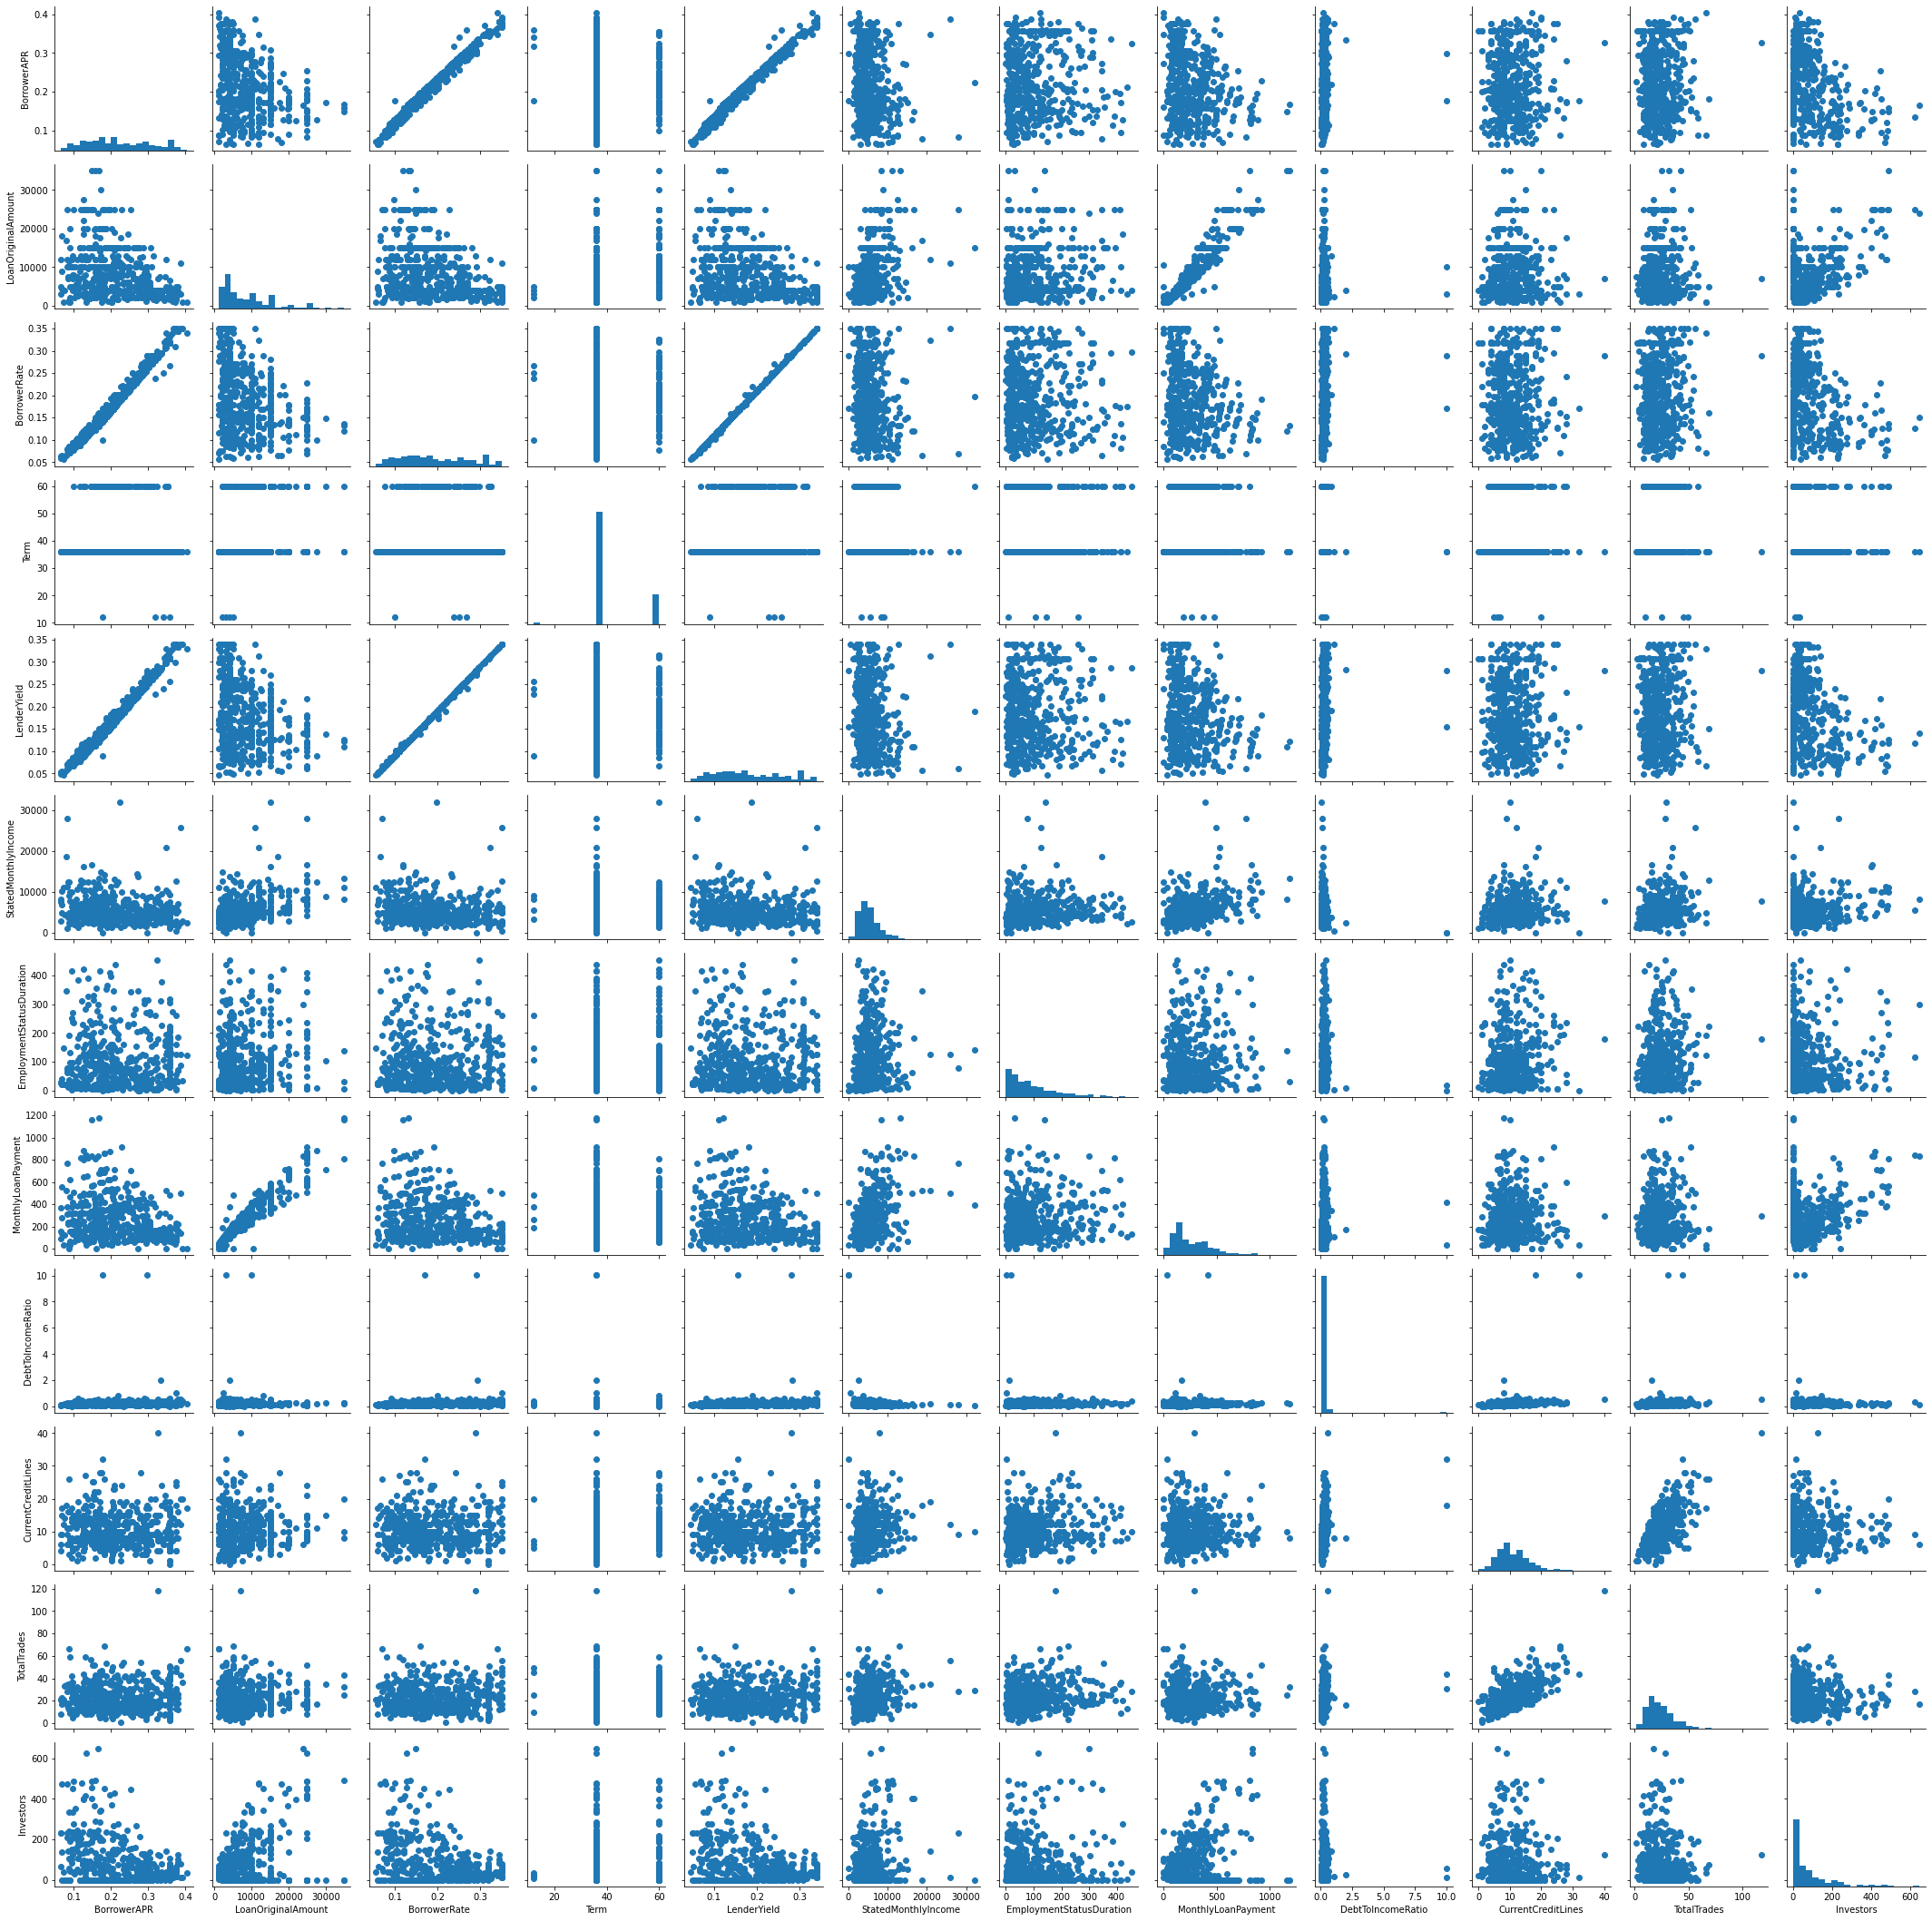

In [365]:
# To visualize the plot matrix of the numeric variables, due to the very high number of values in  
# each column, I chose a random sample of 500 records of mydataset so that the plots can appear 
# clearer and be rendered faster.
# Using Seaborn's PairGrid function

print("Loan_data_clean.shape=",Loan_data_clean.shape)         #To show number of rows & columns of main dataset
Loan_data_clean_samp = Loan_data_clean.sample(n=500, replace = False)
print("Loan_data_clean_samp.shape=",Loan_data_clean_samp.shape) #To show number of rows & columns of sampled dataset

g = sb.PairGrid(data = Loan_data_clean_samp, vars = numeric_vars)

g = g.map_diag(plt.hist, bins = 20);

g.map_offdiag(plt.scatter);

### Observations

For the correlation plot above, the interpretation of the annotation values is such that:  -1 indicates strongest negative correlation between both variables, while +1 indicates strongest positive correlation.

Using the correlation plot and the plot matrix, it can be easily seen that: 

1. BorrowerAPR has a strong positive correlation with BorrowerRate and LenderYield, vice versa

2. LoanOriginalAmount has a strong positive correlation with MonthlyLoanPayment, vice versa

3. CurrentCreditLines has a fairly good positive correlation with TotalTrades, vice versa


With the above results, we can easily tell the good predictor variables for our target variables for each of our three (3) research questions earlier stated.

Question 1: Target/dependent variables of interest = BorrowerAPR or BorrowerRate.
            Predictor/independent variables to explore =  LenderYield
            
Question 2: Target/dependent variable of interest = LoanStatus
            Predictor/independent variables to explore = Not yet determined as the categorical vs 
            numeric variables plot matrix has not been done
            
Question 3: Predictor/independent variable of interest = LoanOriginalAmount
            Target/dependent variables to explore = MonthlyLoanPayment (plus some other variables yet 
            to be determined from the categorical vs numeric variables plot matrix)

Now, looking at the plot matrix showing the relationship between the categorical and numeric variables (using only the following chosen numeric variables: BorrowerAPR, BorrowerRate, LenderYield, LoanOriginalAmount, MonthlyLoanPayment and CurrentCreditLines.

I, thus, will create another numeric variables list

In [366]:
numeric_vars_2 = ['BorrowerAPR', 'LoanOriginalAmount', 'BorrowerRate', 'LenderYield', 'MonthlyLoanPayment', 'CurrentCreditLines']


### Visualization

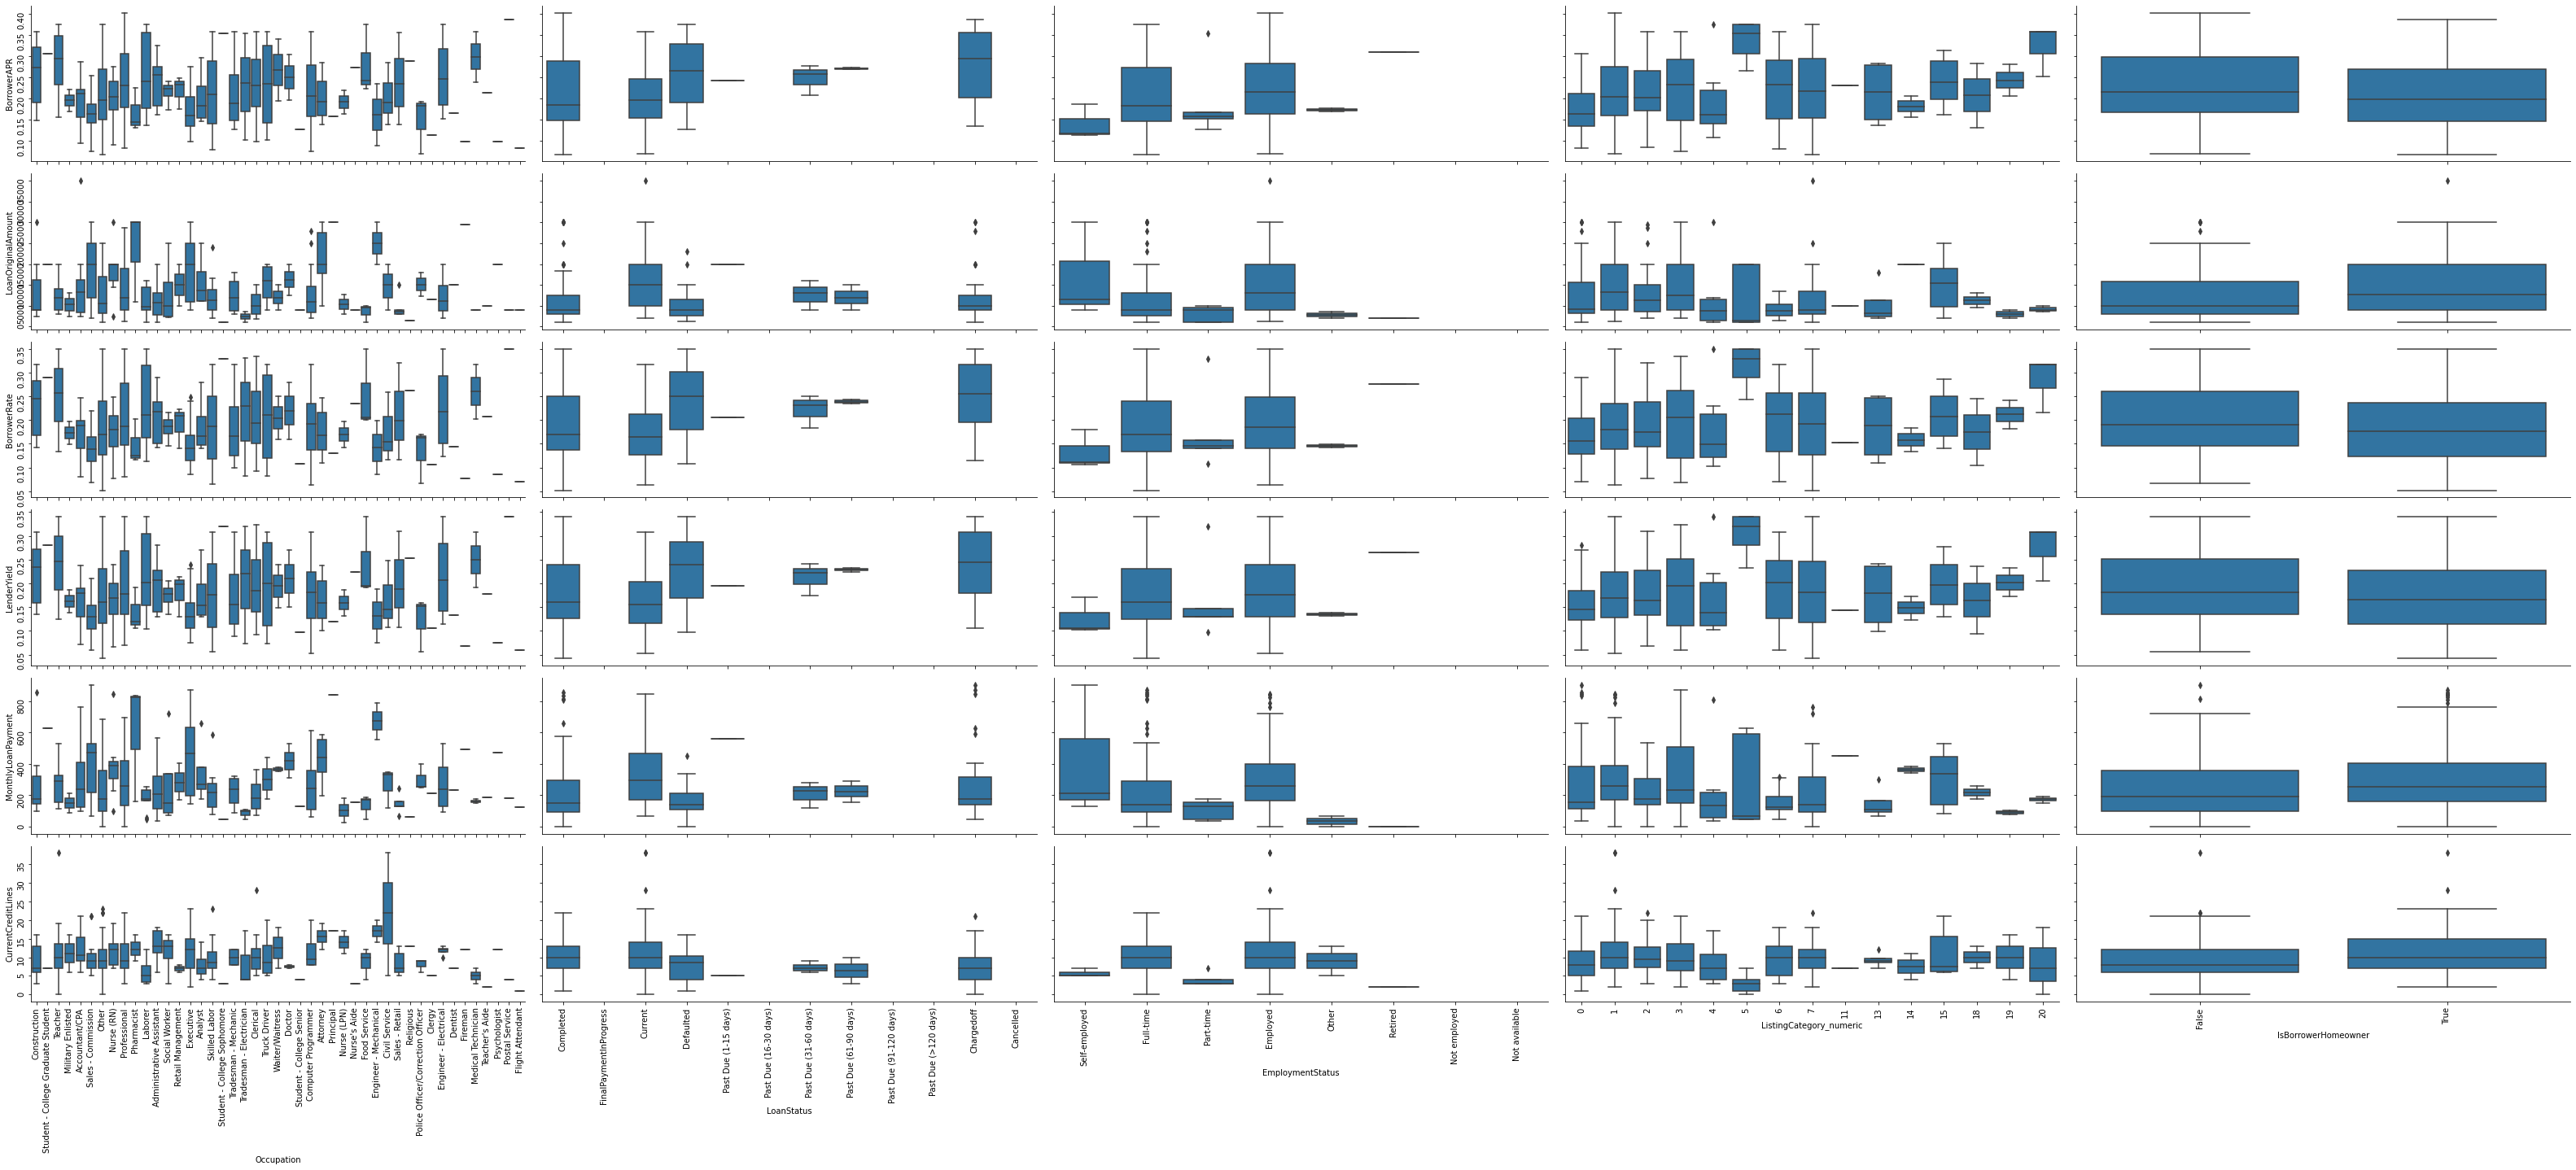

In [367]:
# To show the plot matrix of numeric variables against categorical features, I used a sample size of 
# 300 for clarity of the plot due to the number of variables involved.

Loan_data_clean_samp = Loan_data_clean.sample(n=300, replace = False)

def boxgrid(x, y, **kwargs):
       default_color = sb.color_palette()[0]
       sb.boxplot(x=x, y=y, color=default_color)

g = sb.PairGrid(data = Loan_data_clean_samp, y_vars = numeric_vars_2, x_vars = categoric_vars,
                height = 3, aspect = 3)

# To rotate the xticks 90 degrees
for ax in g.axes.flatten():
    ax.tick_params(rotation = 90)
    
g.map(boxgrid)
plt.show();

So, the plot matrix of the 6 chosen numeric variables vs the categorical variables suggests that, apart from the two boolean variable 'CurrentlyInGroup' all the other categorical variables have a bearing with the numeric features.

So, I will be using all 6 numeric variables ('BorrowerAPR', 'LoanOriginalAmount', 'BorrowerRate', 'LenderYield', 'MonthlyLoanPayment', 'CurrentCreditLines' and 'TotalTrades') and the 5 categorical variables (LoanStatus', EmploymentStatus, 'ListingCategory_numeric', 'Occupation' and IsBorrowerHomeowner), to carryout the final part of the pairwise check

Finally, we look at the relationships between the 5 categorical features

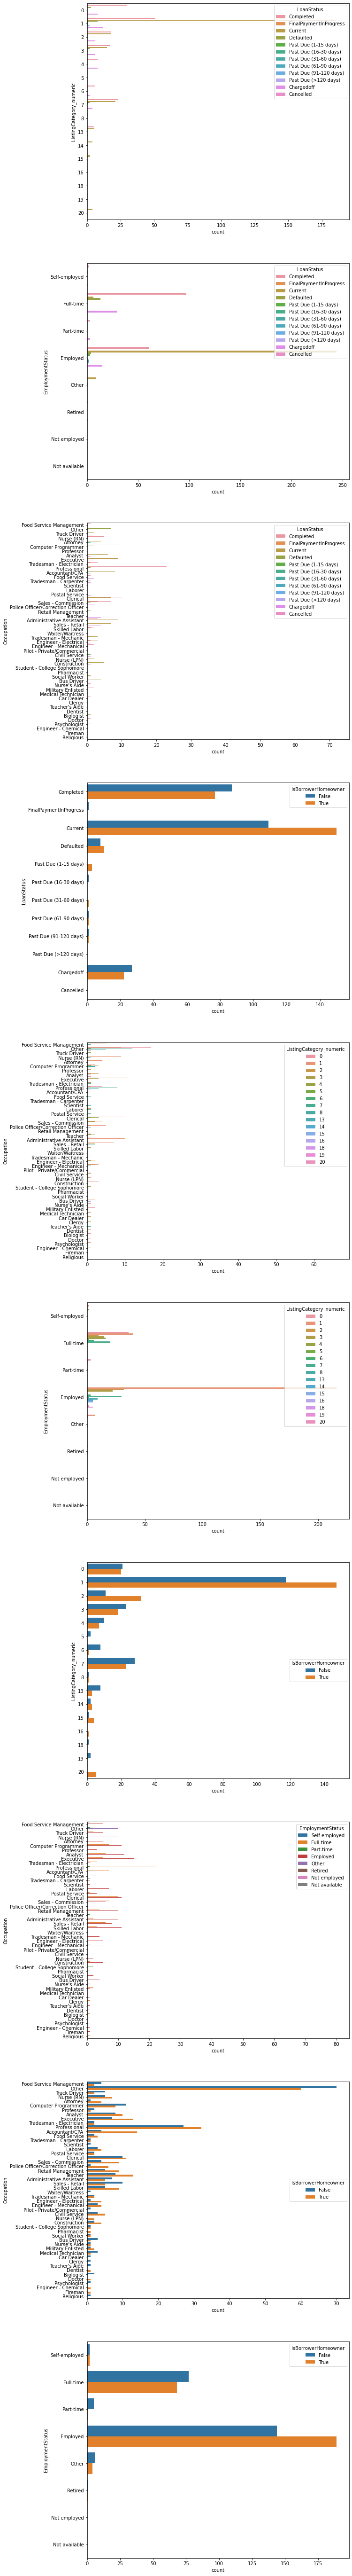

In [368]:
# Each sub-plot will compare two variables at a time.

Loan_data_clean_samp = Loan_data_clean.sample(n=500, replace = False)
plt.figure(figsize = [10, 100])

# subplot 1: LoanStatus vs ListingCategory_numeric
ax = plt.subplot(10, 1, 1)
sb.countplot(data = Loan_data_clean_samp, y = 'ListingCategory_numeric', hue = 'LoanStatus')
ax.legend

# subplot 2: LoanStatus vs EmploymentStatus
ax = plt.subplot(10, 1, 2)
sb.countplot(data = Loan_data_clean_samp, y = 'EmploymentStatus', hue = 'LoanStatus')
ax.legend

# subplot 3: LoanStatus vs. Occupation
ax = plt.subplot(10, 1, 3)
sb.countplot(data = Loan_data_clean_samp, y = 'Occupation', hue = 'LoanStatus')
ax.legend

# subplot 4: LoanStatus vs. IsBorrowerHomeowner
ax = plt.subplot(10, 1, 4)
sb.countplot(data = Loan_data_clean_samp, y = 'LoanStatus', hue = 'IsBorrowerHomeowner')
ax.legend

# subplot 5: ListingCategory_numeric vs. Occupation
ax = plt.subplot(10, 1, 5)
sb.countplot(data = Loan_data_clean_samp, y = 'Occupation', hue = 'ListingCategory_numeric')
ax.legend

# subplot 6: ListingCategory_numeric vs. EmploymentStatus
ax = plt.subplot(10, 1, 6)
sb.countplot(data = Loan_data_clean_samp, y = 'EmploymentStatus', hue = 'ListingCategory_numeric')
ax.legend

# subplot 7: ListingCategory_numeric vs. IsBorrowerHomeowner
ax = plt.subplot(10, 1, 7)
sb.countplot(data = Loan_data_clean_samp, y = 'ListingCategory_numeric', hue = 'IsBorrowerHomeowner')
ax.legend

# subplot 8: Occupation vs. EmploymentStatus
ax = plt.subplot(10, 1, 8)
sb.countplot(data = Loan_data_clean_samp, y = 'Occupation', hue = 'EmploymentStatus')
ax.legend

# subplot 9: Occupation vs. IsBorrowerHomeowner
ax = plt.subplot(10, 1, 9)
sb.countplot(data = Loan_data_clean_samp, y = 'Occupation', hue = 'IsBorrowerHomeowner')
ax.legend

# subplot 10: EmploymentStatus vs. IsBorrowerHomeowner
ax = plt.subplot(10, 1, 10)
sb.countplot(data = Loan_data_clean_samp, y = 'EmploymentStatus', hue = 'IsBorrowerHomeowner')
ax.legend

plt.show()

### Observations

So, we  can clearly observe a pairwise relationship between all the categorical variables. 

Now, I will address my 3 areas of interest earlier stated, using all 6 numeric variables ('BorrowerAPR', 'LoanOriginalAmount', 'BorrowerRate', 'LenderYield', 'MonthlyLoanPayment' and 'CurrentCreditLines') and the 5 remaining categorical variables (LoanStatus', EmploymentStatus, 'ListingCategory_numeric', 'Occupation' and IsBorrowerHomeowner).

### Question 1

What affects the borrower’s APR or interest rate?

Put differently, which variables (predictors) have a bearing on the values of the BorrowerAPR (target) variable? 

Out of my initially stated predictor variables, I am left with with just 3 to explore under this section, viz: LoanOriginalAmount, LenderYield, ListingCategory_numeric, Occupation and MonthlyLoanPayment  

### Visualizations

First, I checked BorrowerAPR (numerical-continuous) vs LenderYield (numerical-continuous) . Due to the large number of values in both columns, I decided to use a heatmap via Seaborn's hist2d function

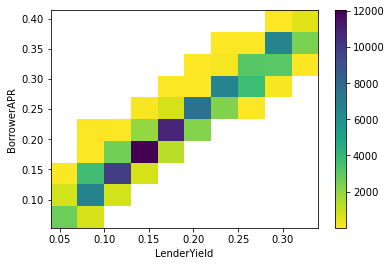

In [369]:
plt.hist2d(data = Loan_data_clean, x = 'LenderYield', y = 'BorrowerAPR', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('LenderYield')
plt.ylabel('BorrowerAPR');

In [370]:
from scipy.stats import pearsonr

# To calculate the correlation coefficient and p-value between both variables
pearsonr(Loan_data_clean['LenderYield'], Loan_data_clean['BorrowerAPR'])

(0.9912191305959873, 0.0)

First value (0.9912191305959873) is the correlation coefficient between both variables (which is very strong), while second value (0.0) is the p-value (which is an indication of the level of significance). Since it's less than 0.05 (which is the highest allowed), then we are good to go .

Next, BorrowerAPR (numeric-continuous) vs LoanOriginalAmount (numeric-discrete). Since a discrete variable is involved, to avoid overplotting I decided to use a heatmap using Seaborn's hist2d function

In [371]:
# To obtain the minimum and maximum values of the LoanOriginalAmount variable to use to set the bins_x and binsize_x = std
Loan_data_clean.LoanOriginalAmount.describe()

count    94744.000000
mean      8752.372752
std       6380.918304
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [372]:
# To obtain the minimum and maximum values of the BorrowerAPR variable to use to set the bins_y and binsize_y = std
Loan_data_clean.BorrowerAPR.describe()

count    94744.000000
mean         0.218301
std          0.080283
min          0.053350
25%          0.155490
50%          0.208080
75%          0.283200
max          0.413550
Name: BorrowerAPR, dtype: float64

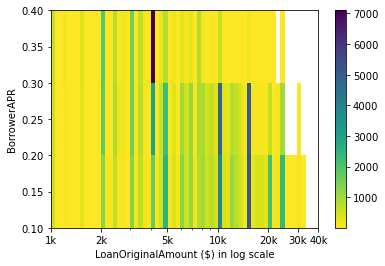

In [373]:
# Since during univariate analysis, log-scaled transformation improved the distribution of the
# LoanOriginalAmount variable, we make use of log transform here for this variable
# Specifying the axes bin edges 

log_binsize = 0.025
binsize_y = 0.1
bins_x = 10** (np.arange(3.0, 4.5+log_binsize, log_binsize))
bins_x = [round(x,1) for x in bins]
bins_y = np.arange(0.1, 0.4+binsize_y, binsize_y)

plt.hist2d(data = Loan_data_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 3e4, 4e4], ['1k', '2k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('LoanOriginalAmount ($) in log scale')
plt.ylabel('BorrowerAPR');

In [374]:
# To calculate the correlation coefficient and p-value between both variables
pearsonr(Loan_data_clean['LoanOriginalAmount'], Loan_data_clean['BorrowerAPR'])

(-0.3466200728756439, 0.0)

A relatively weak inverse relationship exists between both variables. The greater the loan original amount, the less the APR on the loan, which agrees completely with what I would have thought, judging from my everyday experience

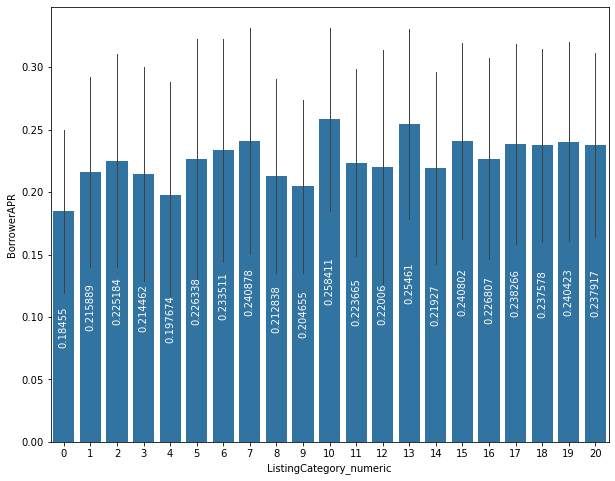

In [375]:
# To check the relationship between BorrowerAPR (numeric) and ListingCategory_numeric (categorical),
# I used seaborn's barplot function

plt.figure(figsize=[10,8])
base_color = sb.color_palette()[0]
ax = sb.barplot(data=Loan_data_clean, x='ListingCategory_numeric', y='BorrowerAPR', color=base_color, errwidth=1, ci='sd')

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0], label_type='center', color='white', rotation=90);

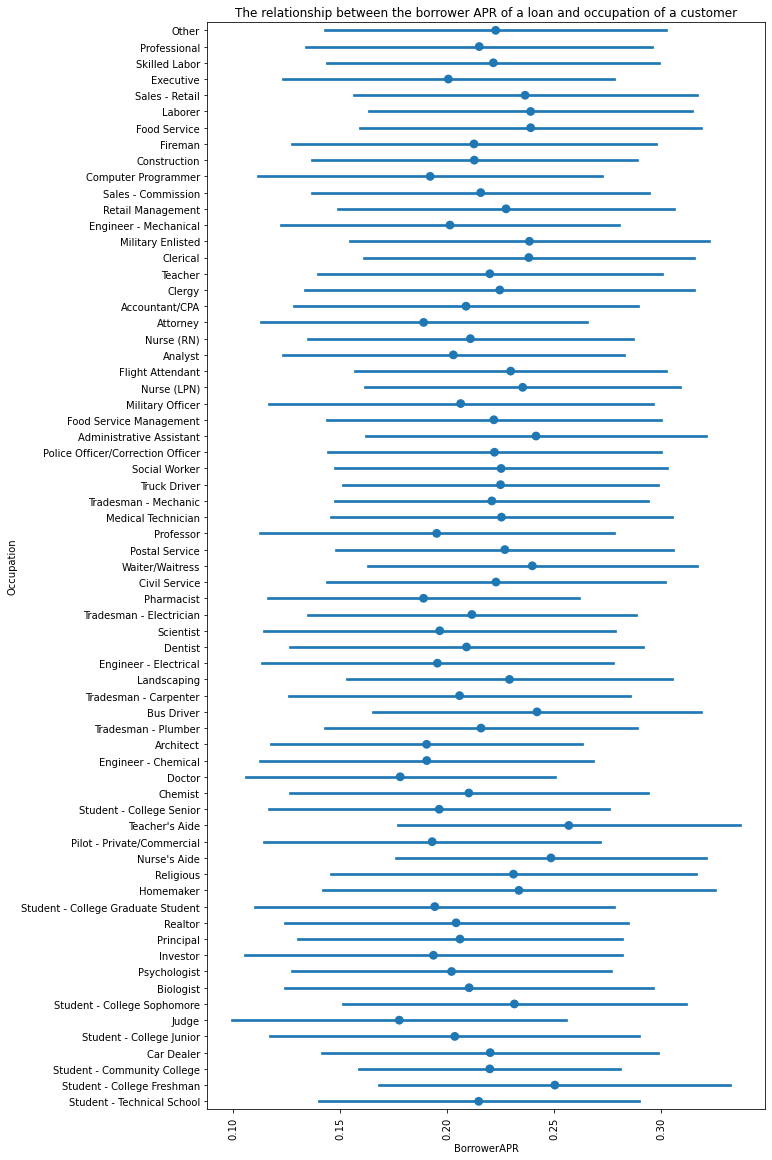

In [376]:
# BorrowerAPR (numeric) vs Occupation (categorical)....seaborn's  pointplot() function

plt.figure(figsize=[10,20])

sb.pointplot(data=Loan_data_clean, y='Occupation', x='BorrowerAPR', ci='sd', linestyles="")
plt.xticks(rotation=90)
plt.title('The relationship between the borrower APR of a loan and occupation of a customer');

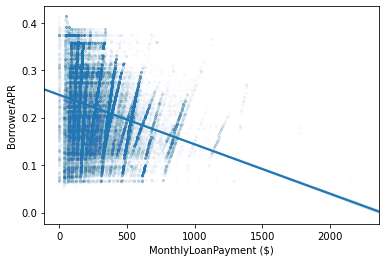

In [377]:
# BorrowerAPR (numeric-continuos) vs MonthlyLoanPayment (numeric-continuous)..seaborn's regplot
# function, employing the help of jittering and transparency to cater for overplotting

sb.regplot(data = Loan_data_clean, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/100, 's':5});

plt.xlabel('MonthlyLoanPayment ($)');

In [378]:
# To calculate the correlation coefficient and p-value between both variables
pearsonr(Loan_data_clean['MonthlyLoanPayment'], Loan_data_clean['BorrowerAPR'])

(-0.251715693325378, 0.0)

With a correlation coefficient of -0.251715693325378 (weak inverse relationship) and a p-value of 0.0, we are fairly good.

### Observations

From all the visualizations above for the first question, the following conclusions can be drawn:

1. There is a strong direct relationship between BorrowerAPR and LenderYield. So, the wanted yield of the borrower (Prosper company) for a particular loan determines the APR fixed on it

2. An inverse relationship exists between BorrowerAPR and LoanOriginalAmount (in log scale). The greater the loan original amount, the less the APR on the loan, which agrees completely with what I would have thought, judging from my everyday experience 

3. Making use of the levels meanings of the ListingCategory_numeric variable (0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans), all the various categories have relatively about the same BorrowerAPR values. So, one cannot really see a clear relationship between both variables. Hence, it would appear that ListingCategory_numeric is not a good predictor variable for BorrowerAPR

4. Occupation is a good determining factor of the BorrowerAPR, with Teacher's Aide having the highest APR. This goes without saying that Teacher's Aide occupation loan takers would receive the lowest loan original amount

5. MonthlyLoanPayment has a weak negative correlation with the BorrowerAPR on a loan, it having an inverse relationship with BorrowerAPR.

### Question 2

What factors affect a loan’s outcome status? 

In other words, which of the following variables are predictors of the LoanStatus variable?  

I decided to explore the following variables: EmploymentStatus,  BorrowerRate and CurrentCreditLines

### Visualizations

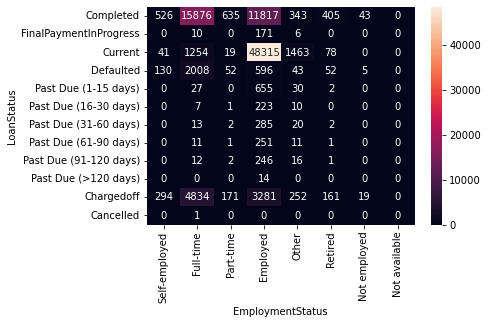

In [379]:
# LoanStatus (qualitative) vs EmploymentStatus (qualitative). I opted for a heatmap.
# Using the seaborn function heatmap() as the 2-D version of a bar chart...

# Using group_by() and size() to get the number of LoanStatus  and each combination of the two
# variable levels as a pandas Series
ct_counts = Loan_data_clean.groupby(['LoanStatus', 'EmploymentStatus']).size()

# Using Series.reset_index() to convert the series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Using DataFrame.pivot() to rearrange the data, to have LoanStatus on rows
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')

# Plotting the heatmap
# Adding fmt = 'd' means that annotations will all be formatted as integers.
# fmt = '.0f' can be used to cater for any cells with no counts, in order to account for NaNs.
sb.heatmap(ct_counts,  annot = True, fmt = 'd'); 

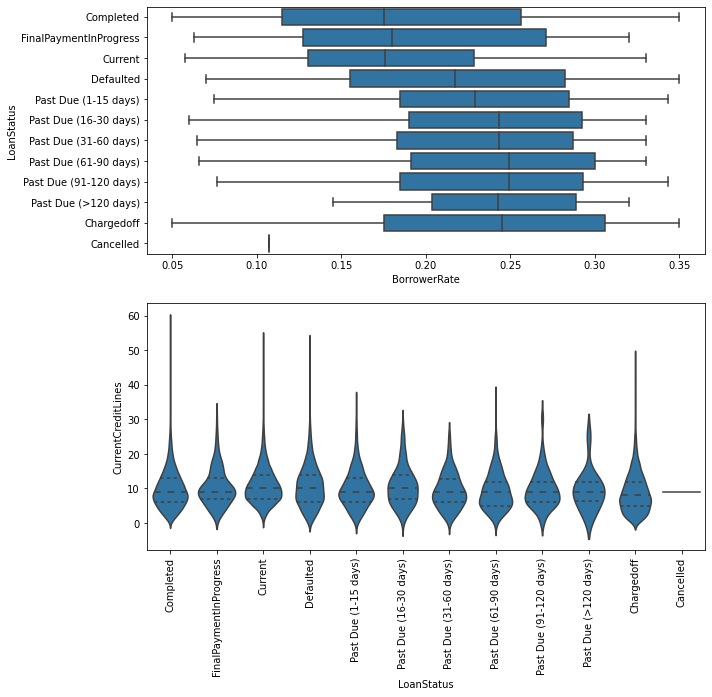

In [380]:
# LoanStatus (categorical) vs BorrowerRate (numeric-continuous) using boxplot
# LoanStatus (categorical) vs CurrentCreditLines (numeric-continuous) using violinplot
# The "inner" argument in the violinplot represents the datapoints in the violin interior, which can take any value
# ranging from “box”, “quartile”, “point”, “stick” or "None" 

base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 10])

# subplot 1: LoanStatus vs BorrowerRate
plt.subplot(2, 1, 1)
sb.boxplot(data=Loan_data_clean, y='LoanStatus', x='BorrowerRate', color=base_color)


# subplot 2: LoanStatus vs CurrentCreditLines
plt.subplot(2, 1, 2)
sb.violinplot(data=Loan_data_clean, x='LoanStatus', y='CurrentCreditLines', color=base_color, inner='quartile')
plt.xticks(rotation=90);

In [381]:
Loan_data_clean.groupby('LoanStatus').BorrowerRate.describe()

,count,mean,std,min,25%,50%,75%,max
LoanStatus,,,,,,,,
Completed,29645.0,0.187290,0.082306,0.0500,0.1151,0.17500,0.256500,0.3500
FinalPaymentInProgress,187.0,0.193586,0.080225,0.0629,0.1272,0.18000,0.271200,0.3199
Current,51170.0,0.182425,0.066352,0.0577,0.1305,0.17600,0.228700,0.3304
Defaulted,2886.0,0.219093,0.073694,0.0699,0.1550,0.21720,0.282175,0.3500
Past Due (1-15 days),714.0,0.229373,0.062937,0.0749,0.1845,0.22900,0.284650,0.3435
Past Due (16-30 days),241.0,0.236129,0.061838,0.0599,0.1899,0.24320,0.292500,0.3304
Past Due (31-60 days),322.0,0.231618,0.064800,0.0649,0.1828,0.24320,0.287000,0.3304
Past Due (61-90 days),275.0,0.240763,0.062687,0.0659,0.1914,0.24890,0.299900,0.3304
Past Due (91-120 days),277.0,0.235522,0.064376,0.0766,0.1845,0.24890,0.293200,0.3435


In [382]:
Loan_data_clean.groupby('LoanStatus').CurrentCreditLines.describe()

,count,mean,std,min,25%,50%,75%,max
LoanStatus,,,,,,,,
Completed,29645.0,9.847765,5.461485,0.0,6.00,9.0,13.00,59.0
FinalPaymentInProgress,187.0,10.417112,5.294278,2.0,7.00,9.0,13.00,31.0
Current,51170.0,11.003459,5.279275,0.0,7.00,10.0,14.00,54.0
Defaulted,2886.0,10.751559,5.932926,0.0,6.00,10.0,14.00,52.0
Past Due (1-15 days),714.0,10.042017,5.484485,0.0,6.00,9.0,13.00,35.0
Past Due (16-30 days),241.0,10.676349,5.585232,0.0,7.00,10.0,14.00,29.0
Past Due (31-60 days),322.0,9.478261,5.063567,0.0,6.00,9.0,12.75,26.0
Past Due (61-90 days),275.0,9.374545,5.358131,0.0,5.00,9.0,12.00,36.0
Past Due (91-120 days),277.0,9.848375,5.487018,0.0,6.00,9.0,12.00,32.0


### Observations

The visualization and describe statistics above reveal that only EmploymentStatus and BorrowerRate variables have a bearing on a loan's outcome status, while CurrentCreditLines does not appreciably affect it.

Observing more intently, one can see from the heatmap above that the employed, and especially fulltime-employed, customers usually have their loans either fully paid back or currently still running, while those not employed or retired are having their loans in the defaulted category. So the employment status does determine the loan status of a customer.

More so, it can be seen from the boxplot and describe statistics (making reference to the mean, Q1, Q2 and Q3 values) above that on the average, loans with higher borrower rates end up being defaulted, paid late or chargedoff, while those with lower borrower rates are either completely paid back or in the process of being paid.

### Question 3

Are there differences between loans depending on how large the original loan amount was? 

In this case, I intended using LoanOriginalAmount to predict the outcome of other variables such as BorrowerAPR/BorrowerRate, Investors and ListingCategory_numeric  

From the visualization done above, we can already see the effect the LoanOriginalAmount has on the BorrowerAPR. 

So, I will just go ahead to check on the other target variables stated above

### Visualizations

For LoanOriginalAmount (numeric-discrete) vs Investors (numeric-discrete), a heatmap is well-suited

In [383]:
# To see the minimum and maximum values of the LoanOriginalAmount variable to use to set the bins_x
# and binsize_x = std

Loan_data_clean.LoanOriginalAmount.describe()

count    94744.000000
mean      8752.372752
std       6380.918304
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [384]:
# To see the minimum and maximum values of the Investors variable to use to set the bins_y 
# binsize_y = std

Loan_data_clean.Investors.describe()

count    94744.000000
mean        82.900543
std        107.100020
min          1.000000
25%          1.000000
50%         44.000000
75%        120.000000
max       1189.000000
Name: Investors, dtype: float64

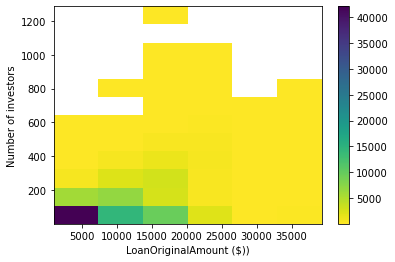

In [385]:
# Specifying the axes bin edges 
binsize_x = 6380
binsize_y = 107.1
bins_x = np.arange(1000, 35000+binsize_x, binsize_x)
bins_y = np.arange(1, 1189+binsize_y, binsize_y)

plt.hist2d(data = Loan_data_clean, x = 'LoanOriginalAmount', y = 'Investors', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('LoanOriginalAmount ($))')
plt.ylabel('Number of investors');

In [386]:
# To calculate the correlation coefficient and p-value between both variables
pearsonr(Loan_data_clean['LoanOriginalAmount'], Loan_data_clean['Investors'])

(0.36099157114288394, 0.0)

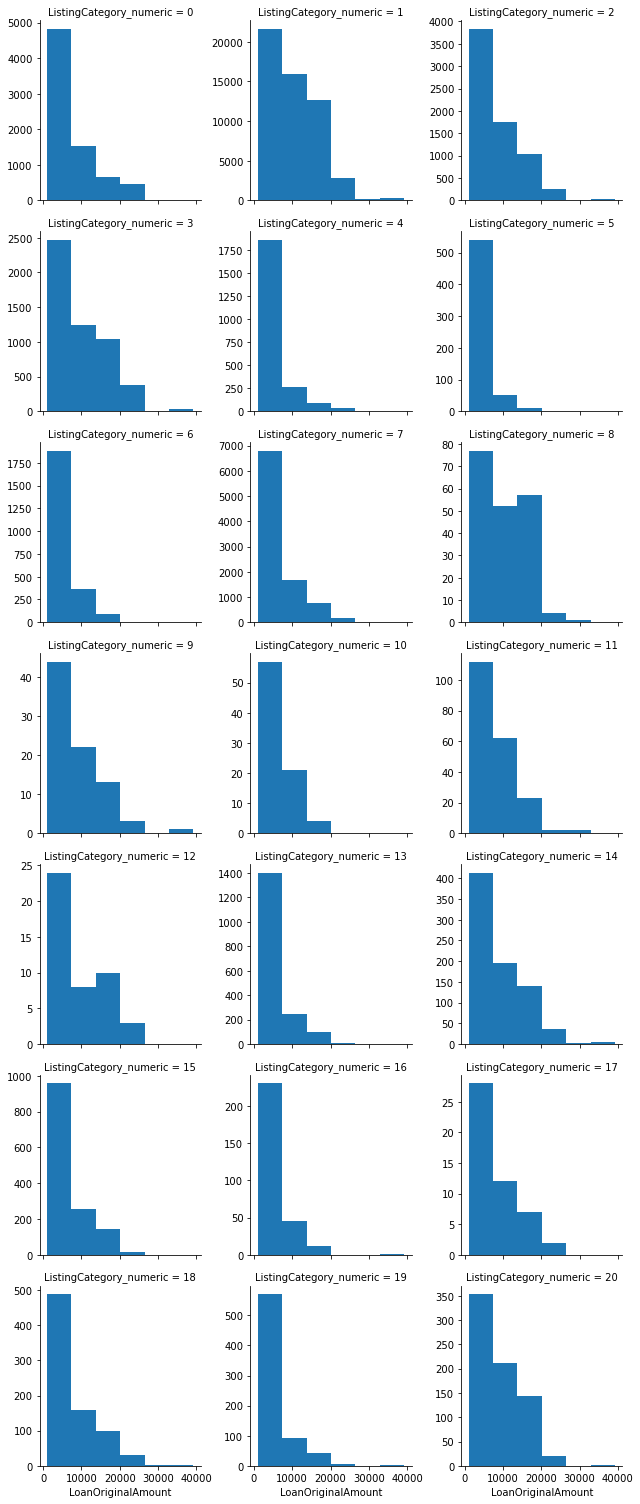

In [387]:
# LoanOriginalAmount(numeric-discrete) vs  ListingCategory_numeric(categorical)...using the technique
# of faceting the various levels of the categorical variable ListingCategory_numeric against the 
# numeric variable LoanOriginalAmount
# Since the ListingCategory_numeric categorical variable is ordinal in nature, there is no need to 
# convert it into an ordered categorical type

binsize = 6380
bin_edges = np.arange(1000, 35000+binsize, binsize)   #for the LoanOriginalAmount numeric variable           

g = sb.FacetGrid(data = Loan_data_clean, col = 'ListingCategory_numeric', col_wrap=3, sharey=False)
g.map(plt.hist, 'LoanOriginalAmount', bins = bin_edges);

### Observations

From the visualizations above, we can deduce that 

1. One difference in loans that exixts is that the higher the LoanOriginalAmount, the lesser the APR on the loan. So, loans differ in that sense.

2. Another area in which loans differ is in terms of the ListingCategory_numeric variable. It can be observed that the following categories are more inclined to take larger loans (even though the frequency of such loans are quite low): 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 8 - Baby&Adoption, 9 - Boat, 12 - Green Loans, , 14 - Large Purchases, 17 - RV, 18 - Taxes and 20 - Wedding Loans. 
While  4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 10 - Cosmetic Procedure, 11 - Engagement Ring, 13 - Household Expenses, 15 - Medical/Dental, 16 - Motorcycle and 19 - Vacation are more inclined towards lower loan amounts. This comes as no surprise to meet as this agrees with what is generally in practice in everyday life.

LoanOriginalAmount does not have a strong relationship with the number of investors footing the loan as can be seen from both the visualization and the correlation coefficient

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For the first feature of interest (BorrowerAPR), I noticed a strong direct relationship between it and LenderYield. So, the wanted yield of the borrower (Prosper company) for a particular loan determines the APR fixed on it. 

I also observed an inverse relationship between BorrowerAPR and LoanOriginalAmount (in log scale). The greater the loan original amount, the less the APR on the loan, which agrees completely with what I would have thought, judging from my everyday experience. 

As regards ListingCategory_numeric variable, I could not really see a clear relationship between both variables. Hence, it would appear that ListingCategory_numeric does not determine BorrowerAPR. 

Occupation is a good determining factor of the BorrowerAPR, with Teacher's Aide having the highest APR. This goes without saying that Teacher's Aide occupation loan takers would receive the lowest loan original amount

MonthlyLoanPayment can certainly help us determine the APR on a loan, it having an inverse relationship with BorrowerAPR. The higher the monthly loan payments the lower the APR, vice versa.

> For my second feature of interest (LoanStatus), only EmploymentStatus and BorrowerRate variables have a bearing on a loan's status outcome, while CurrentCreditLines does not appreciably affect it.
Looking deeply, I could see that the employed, and especially fulltime-employed, customers usually have their loans either fully paid back or currently still running, while those not employed or retired are having their loans in the defaulted category or past due date. So the employment status does determine the loan status of a customer.

More so, it can be seen that loans with higher borrower rates end up being defaulted, paid late or chargedoff, while those with lower borrower rates are either completely paid back or in the process of being paid.

> And for my third feature of interest (LoanOriginalAmount), I discovered that one difference taht exists between loans is that the higher the LoanOriginalAmount, the greater the APR on the loan. So, loans differ in that sense.

Another area in which loans differ is in terms of the ListingCategory_numeric variable. The highest loan original amount values are associated with listing categories of 1 (Debt Consolidation) and 2 (Home Improvement). The rest of the categories are associated with lower loan original amounts.

LoanOriginalAmount had no observable relationship with Investors.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From the pairwise investigations carried out, I noticed the following relationships between the other secondary features:

1. CurrentCreditLines has a strong positive correlation with OpenRevolvingAccounts and a fairly good positive correlation with TotalTrades.

2. OpenRevolvingAccounts has a fairly good positive correlation with OpenRevolvingMonthlyPayment.

3. RevolvingCreditBalance has a strong positive correlation with OpenRevolvingMonthlyPayment.

4. Apart from the boolean variable CurrentlyInGroup, all the other categorical variables have a relationship with one another and also with the numeric features.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question

If a customer is both employed and is a homeowner, does this affect the amount of loan he can be given by Prosper? Would Prosper company consider him more eligible to pay back the loan completely?

For this question, I will investigate the relationship between the three variables: LoanOriginalAmount (numeric-discrete), EmploymentStatus (categorical) and IsBorrowerHomeowner (categorical).

### Visualization

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


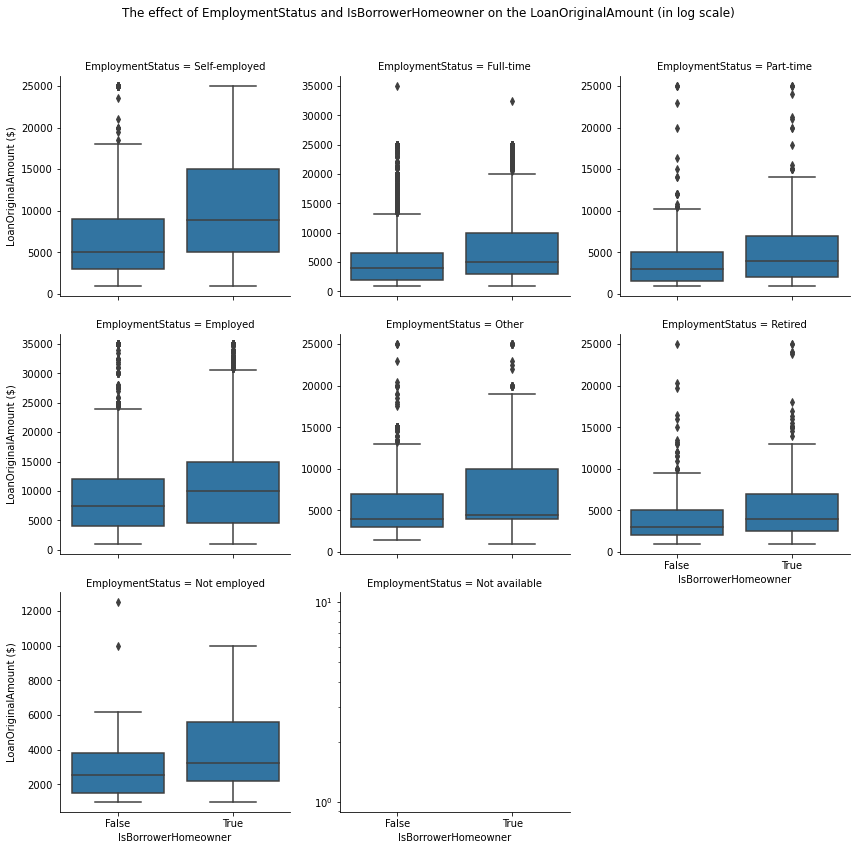

In [388]:
# Using the faceting technique (faceting on EmploymentStatus)

binsize = 6380
bin_edges = np.arange(1000, 35000+binsize, binsize)   #for the LoanOriginalAmount numeric variable

g = sb.FacetGrid(data = Loan_data_clean, col = 'EmploymentStatus', col_wrap=3, sharey=False, height = 4)
g.map(sb.boxplot, 'IsBorrowerHomeowner', 'LoanOriginalAmount')
plt.yscale('log')
g.set_xlabels('IsBorrowerHomeowner')
g.set_ylabels('LoanOriginalAmount ($)')

# To add overall title to the plot
g.fig.suptitle('The effect of EmploymentStatus and IsBorrowerHomeowner on the LoanOriginalAmount (in log scale)')

# To move the overall title slightly higher up so it does not overlap with the labels of the plot
g.fig.subplots_adjust(top=.9);

### Observations

As seen above, in all cases if a borrower is a home owner the loan original amount obtainable is higher, whether the borrower is employed or not, although in cases where employed the amount obtainable is higher than when not employed. This may be due to the fact that the property could be used as collateral by the borrower, making them appear less of a risk to transact with by Prosper company

### Question

What is the combined effect of the BorrowerAPR and MonthlyLoanPayment on the final outcome of a loan?

Here, we will examine the relationship between the three variables: BorrowerAPR(numeric-continuous), MonthlyLoanPayment(numeric-continuous) and LoanStatus(categorical)

In [389]:
# Describe statistics for the BorrowerAPR variable to obtain relevant values for the numpy's arange function
Loan_data_clean.BorrowerAPR.describe()

count    94744.000000
mean         0.218301
std          0.080283
min          0.053350
25%          0.155490
50%          0.208080
75%          0.283200
max          0.413550
Name: BorrowerAPR, dtype: float64

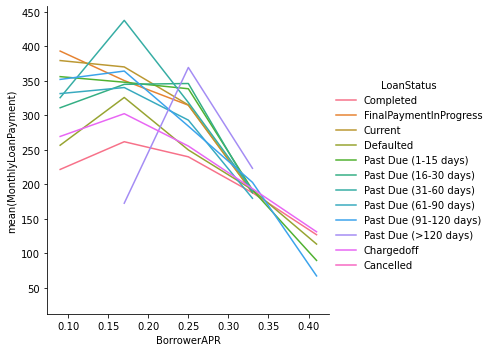

In [390]:
# Using a line plot via the errorbar matplotlib function

def mean_poly(x, y, bins = 10, **kwargs):
    
    # Setting bin edges if none or int is specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # Computing counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # Creating the line plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.05, 0.41+0.08, 0.08)
g = sb.FacetGrid(data = Loan_data_clean, hue = 'LoanStatus', height = 5)
g.map(mean_poly, "BorrowerAPR", "MonthlyLoanPayment", bins = bin_edges)
g.set_ylabels('mean(MonthlyLoanPayment)')
g.add_legend();

### Observations

For most cases, the borrower APR had an initial direct relationship with the monthly loan payments, but after which an inverse relationship, such that the higher the BorrowerAPR, the less the monthly loan payments. Altough most customers having a slightly higher monthly loan payment can be observed to have a loan status of either completed, currently running or final payment in progress. This is quite different from what I would have thought taking a superficial initial look at the dataset

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed that if a borrower is a home owner the loan original amount obtainable is higher, whether the borrower is employed or not, although in cases where employed the amount obtainable is higher than when not employed. This may be due to the fact that the property could be used as collateral by the borrower, making them appear less of a risk to award a loan by Prosper company

### Were there any interesting or surprising interactions between features?

> For most cases, the borrower APR had an initial direct relationship with the monthly loan payments, but after which an inverse relationship, such that the higher the BorrowerAPR, the less the monthly loan payments. I found that quite surprising and a bit unexpected. 

> Again, most customers having a slightly higher monthly loan payment can be observed to have a loan status of either completed, currently running or final payment in progress. This is quite different from what I would have thought taking a superficial initial look at the dataset because I would think that the higher the monthly loan payments and BorrowerAPR the more challenging it would be to clear the loan.

## Conclusions

So, from the entire exploration process, I can see clearly that a number of factors affect the borrower's annual percentage rate: The expected yield of the company/investors and the original amount of the loan.    

More so, lower income earners tend to go for lower amounts of loans. Again, the reason why a loan is applied for also determines the amount of loan the customer obtains. Customers tend to take huge amounts of loans only for major and necessary expenses, and also only occasionally, than for everday expenses.

The EmploymentStatus and Occupation of a customer and the BorrowerRate of a loan are major factors determining if Prosper company would be able to successfully recover their loans.

I was able to get all of these insights because I was progressive in my exploration. I first of all performed some wrangling operation on my dataset to get the variables ready for exploration. Next, I produced visualizations on each of the variables of my interest to deal with skewness. Then I checked for pairwise relationships between variables before moving on to investigate bivariate relationships. Finally, I dug deeper by examining multivariate relationships between groups of variables.

In [391]:
# To save the dataset as a file
Loan_data_clean.to_csv('Loan_data_clean.csv', index=False)